<a href="https://colab.research.google.com/github/guydav/deep-learning-projects/blob/master/notebooks/Dendrogram_Loss_Github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!kill -9 -1

## Setup

In [1]:
import sys

!git clone https://github.com/guydav/deep-learning-projects.git
!pip install -q -r deep-learning-projects/requirements.txt
!wandb login 9676e3cc95066e4865586082971f2653245f09b4
sys.path.extend(('./deep-learning-projects', './src/tqdm'))

Cloning into 'deep-learning-projects'...
remote: Enumerating objects: 287, done.
remote: Counting objects: 100% (287/287), done.
remote: Compressing objects: 100% (197/197), done.
remote: Total 287 (delta 155), reused 206 (delta 86), pack-reused 0
Receiving objects: 100% (287/287), 6.71 MiB | 9.69 MiB/s, done.
Resolving deltas: 100% (155/155), done.
tcmalloc: large alloc 1073750016 bytes == 0x61702000 @  0x7f3c059472a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
Branch 'colab' set up to track remote branch 'colab' from 'origin'.
Switched to a new branch 'colab'
spacy 2.0.18 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
torchv

## Mount and sync data

In [3]:
!add-apt-repository -y ppa:alessandro-strada/google-drive-ocamlfuse-beta
!apt-get update
!apt-get install google-drive-ocamlfuse
!apt-get -y install -qq fuse
from google.colab import auth
auth.authenticate_user()

from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

!mkdir -p drive
!google-drive-ocamlfuse drive
!google-drive-ocamlfuse -cc

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:4 http://ppa.launchpad.net/alessandro-strada/google-drive-ocamlfuse-beta/ubuntu bionic InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  Release
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Reading package lists... Done
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-

In [4]:
!ls -la "drive/Research Projects/DendrogramLoss/models"

total 68
drwxr-xr-x 2 root root 4096 Dec 16 11:33 .
drwxr-xr-x 2 root root 4096 Dec 16 11:33 ..
drwxr-xr-x 2 root root 4096 Dec 18 01:42 alphabetical_dendrogram_loss_cnn_mlp
drwxr-xr-x 2 root root 4096 Dec 19 22:58 alphabetical_hinge_squared_dendrogram_loss_cnn_mlp
drwxr-xr-x 2 root root 4096 Dec 16 13:47 cnn_mlp_standard_conv_model
drwxr-xr-x 2 root root 4096 Dec 17 19:46 dendrogram_loss_cnn_mlp
drwxr-xr-x 2 root root 4096 Dec 19 10:47 hinge_dendrogram_loss_cnn_mlp
drwxr-xr-x 2 root root 4096 Dec 18 21:46 hinge_loss_fixed_cnn_mlp
drwxr-xr-x 2 root root 4096 Dec 19 18:25 hinge_squared_dendrogram_margin_loss_cnn_mlp
drwxr-xr-x 2 root root 4096 Dec 19 01:53 hinge_squared_loss_fixed_cnn_mlp
drwxr-xr-x 2 root root 4096 Dec 18 19:53 l1_loss_fixed_cnn_mlp
drwxr-xr-x 2 root root 4096 Dec 19 15:13 large_margin_hinge_squared_dendrogram_loss_cnn_mlp
drwxr-xr-x 2 root root 4096 Dec 19 12:55 large_margin_hinge_squared_loss_cnn_mlp
drwxr-xr-x 2 root root 4096 Dec 17 11:42 mse_loss_cnn_mlp
drwxr-xr-

## Torch Setup

In [9]:
import os
os.chdir('./deep-learning-projects')
!git pull
os.chdir('..')

remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 5 (delta 4), reused 5 (delta 4), pack-reused 0
Unpacking objects: 100% (5/5), done.
From https://github.com/guydav/deep-learning-projects
   851f38c..6e7d942  master     -> origin/master
Updating 851f38c..6e7d942
Fast-forward
 projects/dendrogram/cnn_model.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)


In [0]:
import projects
from projects.metalearning import *
from projects.dendrogram import *

## Load data

Augmentation and normalization from https://github.com/kuangliu/pytorch-cifar/blob/master/main.py

In [6]:
trainset, train_dataloader, testset, test_dataloader, classes = load_cifar_10()

Files already downloaded and verified


## ResNet model

Trying an alternative ResNet implementation from https://github.com/kuangliu/pytorch-cifar/blob/master/models/resnet.py

**TODO:** what's the difference between that one and the PyTorch default? 

https://github.com/pytorch/vision/blob/master/torchvision/models/resnet.py

## Create model and start training

In [10]:
current_epoch = 10

resnet_18_ce_loss = resnet.create_resnet18('resnet_18_ce_loss_test', num_classes=10)
resnet_18_ce_loss.load_model(current_epoch)
resnet_18_ce_loss = resnet_18_ce_loss.cuda()

512


In [8]:
# os.environ['WANDB_RUN_ID'] = 'z46433y4'
# os.environ['WANDB_RESUME'] = 'must'
wandb.init(project="dendrogram-loss") #, resume=True)

current_model = resnet_18_ce_loss

wandb.config.epochs = 100
wandb.config.lr = current_model.lr
wandb.config.decay = current_model.weight_decay
wandb.config.loss = 'CE'
wandb.config.batch_size = train_dataloader.batch_size
wandb.config.description = 'ResNet18, post-refactor test'

W&B Run: https://app.wandb.ai/None/dendrogram-loss/runs/ikc741ig
Call `%%wandb` in the cell containing your training loop to display live results.


2019-01-03 10:36:22: After epoch 11, TRAIN acc is 86.8107, loss is 0.3673, AUC is 0.9319,and correct rank is 1.2067
2019-01-03 10:36:38: After epoch 11, TEST acc is 83.7000, loss is 0.4634, AUC is 0.9116,and correct rank is 1.2753
2019-01-03 10:40:24: After epoch 12, TRAIN acc is 87.8849, loss is 0.3407, AUC is 0.9376,and correct rank is 1.1881
2019-01-03 10:40:38: After epoch 12, TEST acc is 84.7000, loss is 0.4282, AUC is 0.9180,and correct rank is 1.2465
Resuming run: https://app.wandb.ai/guy/dendrogram-loss/runs/ikc741ig
2019-01-03 10:44:25: After epoch 13, TRAIN acc is 88.5627, loss is 0.3141, AUC is 0.9411,and correct rank is 1.1721
2019-01-03 10:44:39: After epoch 13, TEST acc is 85.0000, loss is 0.4229, AUC is 0.9200,and correct rank is 1.2473
2019-01-03 10:48:26: After epoch 14, TRAIN acc is 89.1432, loss is 0.3022, AUC is 0.9446,and correct rank is 1.1643
2019-01-03 10:48:40: After epoch 14, TEST acc is 85.8000, loss is 0.4032, AUC is 0.9233,and correct rank is 1.2267
2019-01

ValueError: ignored

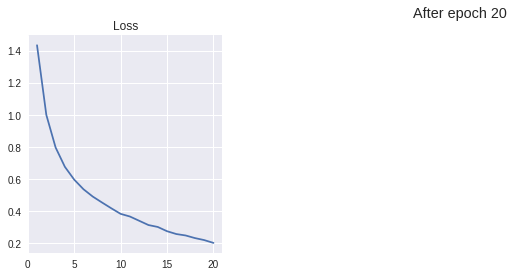

In [11]:
total_epochs = 30
wandb.config.update(dict(epochs=total_epochs), allow_val_change=True)

train(resnet_18_ce_loss, train_dataloader, test_dataloader, 
      num_epochs=total_epochs - current_epoch, epochs_to_test=1, epochs_to_graph=10, 
      num_batches_to_print=2000, start_epoch=current_epoch, watch=False)

In [16]:
len(resnet_18_ce_loss.results['train_aucs'])

20

## Trying with a simpler CNN-MLP model

In [7]:
current_epoch = 0


test_model = cnn_model.DendrogramPoolingDropoutCNNMLP(name='post_refactor_test')
test_model.load_model(current_epoch)
test_model = test_model.cuda()

512


In [8]:
# os.environ['WANDB_RUN_ID'] ='rmcq1zy8'
# os.environ['WANDB_RESUME'] = 'must'
import wandb
wandb.init(project="dendrogram-loss")

current_model = test_model

# wandb.config.epochs = 100
wandb.config.lr = current_model.lr
wandb.config.decay = current_model.weight_decay
wandb.config.loss = 'CE'  # current_model.use_mse and 'MSE' or 'CE'
wandb.config.batch_size = train_dataloader.batch_size
wandb.config.description = 'Post-refactor model test'

W&B Run: https://app.wandb.ai/guy/dendrogram-loss/runs/pi8la65y
Call `%%wandb` in the cell containing your training loop to display live results.


2019-01-02 08:38:39: After epoch 1, TRAIN acc is 29.1611, loss is 1.8432, AUC is 0.6094,and correct rank is 3.1638
2019-01-02 08:38:46: After epoch 1, TEST acc is 38.3000, loss is 1.6511, AUC is 0.6595,and correct rank is 2.6622
2019-01-02 08:39:07: After epoch 2, TRAIN acc is 40.3171, loss is 1.6057, AUC is 0.6714,and correct rank is 2.5694
2019-01-02 08:39:13: After epoch 2, TEST acc is 44.1000, loss is 1.5431, AUC is 0.6916,and correct rank is 2.4500
Resuming run: https://app.wandb.ai/guy/dendrogram-loss/runs/pi8la65y
2019-01-02 08:39:35: After epoch 3, TRAIN acc is 45.3095, loss is 1.4982, AUC is 0.7002,and correct rank is 2.3990
2019-01-02 08:39:42: After epoch 3, TEST acc is 48.4000, loss is 1.4443, AUC is 0.7154,and correct rank is 2.2935
2019-01-02 08:40:04: After epoch 4, TRAIN acc is 48.3325, loss is 1.4267, AUC is 0.7168,and correct rank is 2.2914
2019-01-02 08:40:10: After epoch 4, TEST acc is 49.3000, loss is 1.4097, AUC is 0.7216,and correct rank is 2.2826
2019-01-02 08:4

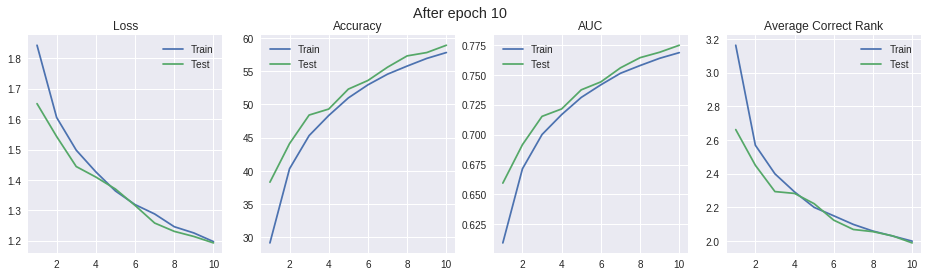

2019-01-02 08:43:19: After epoch 11, TRAIN acc is 58.4629, loss is 1.1810, AUC is 0.7728,and correct rank is 1.9692
2019-01-02 08:43:26: After epoch 11, TEST acc is 59.3000, loss is 1.1789, AUC is 0.7761,and correct rank is 1.9629
2019-01-02 08:43:47: After epoch 12, TRAIN acc is 59.4757, loss is 1.1602, AUC is 0.7783,and correct rank is 1.9564
2019-01-02 08:43:54: After epoch 12, TEST acc is 61.0000, loss is 1.1462, AUC is 0.7867,and correct rank is 1.9258
2019-01-02 08:44:15: After epoch 13, TRAIN acc is 60.1202, loss is 1.1447, AUC is 0.7819,and correct rank is 1.9379
2019-01-02 08:44:22: After epoch 13, TEST acc is 61.1000, loss is 1.1192, AUC is 0.7868,and correct rank is 1.9009
2019-01-02 08:44:43: After epoch 14, TRAIN acc is 60.5575, loss is 1.1307, AUC is 0.7850,and correct rank is 1.9130
2019-01-02 08:44:49: After epoch 14, TEST acc is 60.7000, loss is 1.1305, AUC is 0.7837,and correct rank is 1.9179
2019-01-02 08:45:11: After epoch 15, TRAIN acc is 60.6624, loss is 1.1214, A

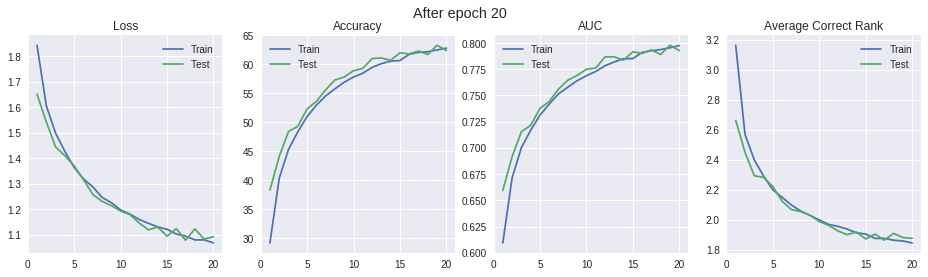

In [9]:
total_epochs = 20
wandb.config.update(dict(epochs=total_epochs), allow_val_change=True)

base_model.train(test_model, train_dataloader, test_dataloader, 
      num_epochs=total_epochs - current_epoch, epochs_to_test=1, epochs_to_graph=10, 
      num_batches_to_print=2000, start_epoch=current_epoch, watch=False)

## Implememting a custom, dendrogram-based loss

In [0]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
from itertools import combinations_with_replacement

class DendrogramLoss(torch.nn.Module):
    def __init__(self, dendrogram, classes, distances=None, distance_increment=1.0):
        super(DendrogramLoss, self).__init__()
        
        self.register_buffer('distance_increment', torch.tensor(distance_increment).float())
        
        if type(dendrogram) == dict:
            key = next(iter(dendrogram))
            val = dendrogram[key]
            if type(val) == dict:
                self.dendrogram = nx.from_dict_of_dicts(dendrogram)
            elif type(val) in (list, tuple):
                self.dendrogram = nx.from_dict_of_lists(dendrogram)
            else:
                raise ValueError(f'Received a dendrogram dictionary with unknown value type: {type(val)}')
        
        elif type(dendrogram) == nx.classes.graph.Graph:
            self.dendrogram = dendrogram
        
        else:
            raise ValueError(f'Received a dendrogram of unknown type: {type(dendrogram)}')
        
        self.classes = classes
        if distances is not None:
            self.distances = distances
        else:
            self._dendrogram_to_distances()
        
    def _dendrogram_to_distances(self):
        all_distances =  dict(nx.floyd_warshall(self.dendrogram))
        num_classes = len(actual_classes)
        distances = np.zeros((num_classes, num_classes))
        
        for i, j in combinations_with_replacement(np.arange(num_classes), 2):
            distances[i, j] = distances[j, i] = all_distances[self.classes[i]][self.classes[j]]
            
        # adding 1 since this is a multiplicative factor, and the factor for a node * itself should be one
        # this creates ones on the diagonal and > 1 everywhere else
        # TODO: do I need to move this to a device?
        distances = torch.from_numpy(distances).float() + self.distance_increment
        self.register_buffer('distances', distances)
        
    """
    def plot_dendrogram(self):
        plt.figure(figsize=(12, 8))
        layout = graphviz_layout(self.dendrogram)
        node_colors = [0.8 - 0.4 * float(n in self.classes) for n in graph.nodes()]
        labels = nx.get_edge_attributes(self.dendrogram, 'weight')
        nx.draw_networkx_edge_labels(self.dendrogram, layout, edge_labels=labels)
        nx.draw(self.dendrogram, layout, with_labels=True, node_color=node_colors, node_size=2000,
                cmap=plt.cm.spectral, linewidths=3, font_color='c', font_size=14)
    """
        
    def forward(self, output, labels):
        # output are the [batch size] x [num classes] softmax of predictions
        # labels are the [batch size] x [num classes] binarized labels
        square_errors = torch.pow(output - labels, 2)
        weighted_errors = torch.mul(square_errors, torch.matmul(labels, self.distances))
        return weighted_errors.mean()

    
class HingeDendrogramLoss(DendrogramLoss):
    def __init__(self, dendrogram, classes, distances=None, distance_increment=1.0, p=1, margin=1.0):
        super(HingeDendrogramLoss, self).__init__(dendrogram, classes, distances, distance_increment)
        self.p = p
        self.margin = margin
        
    def forward(self, output, labels):
        # output are the [batch size] x [num classes] softmax of predictions
        # labels are the [batch size] x [1] label indices
        correct_class_scores = output.gather(1, labels.view(-1, 1))
        # weigh each score by the correct distances
        margin_scores = torch.pow(torch.clamp(self.margin + output - correct_class_scores, min=0), self.p) * self.distances[labels]
        # we don't want to index through the correct class, which will always contribute a penalty of self.margin
        # Thus, before averaging for each example, we subtract out the determinstic score for the correct class
        # Note that since for the correct class the distance is always one, we dont have to account for it when subtracting
        per_example_loss = (margin_scores.sum(1) - self.margin ** self.p) / output.shape[1]
        # assuming mean reduction, as is PyTorch's deafult
        return per_example_loss.mean()
    

class HingeDendrogramMarginLoss(DendrogramLoss):
    def __init__(self, dendrogram, classes, distances=None, distance_increment=0.0, p=1, distance_scale=1.0):
        super(HingeDendrogramMarginLoss, self).__init__(dendrogram, classes, distances, distance_increment)
        self.p = p
        self.distances = self.distances / distance_scale
        
    def forward(self, output, labels):
        # output are the [batch size] x [num classes] softmax of predictions
        # labels are the [batch size] x [1] label indices
        correct_class_scores = output.gather(1, labels.view(-1, 1))
        # weigh each score by the correct distances
        margin = self.distances[labels]
        margin_scores = torch.pow(torch.clamp(margin + output - correct_class_scores, min=0), self.p)
        # we don't want to index through the correct class, which will always contribute a penalty of self.margin
        # In this case, it's not a problem, since the margin for the correct class is zero, 
        # and the output is equal the correct class score, so the correct class never contributes to the loss
        per_example_loss = margin_scores.sum(1) / output.shape[1]
        # assuming mean reduction, as is PyTorch's deafult
        return per_example_loss.mean()

## Create a sample dendrogram

I would plot it, but the graphing library doesn't work on Colab

In [0]:
edge_dicts = {
    'root': {'transport': {'weight': 1}, 'animal': {'weight': 1} },
    'transport': {'air': {'weight': 1}, 'land': {'weight': 1}, 'sea': {'weight': 1} },
    'air': {'airplane': {'weight': 1}},
    'sea': {'ship': {'weight': 1}},
    'land': {'auto': {'weight': 0.5}, 'truck': {'weight': 0.5}},
    'animal': {'mammal': {'weight': 1}, 'bird': {'weight': 2}, 'frog': {'weight': 2}},
    'mammal': {'domsetic': {'weight': 0.5}, 'deer': {'weight': 1}, 'horse': {'weight': 1}},
    'domsetic': {'cat': {'weight': 0.5}, 'dog': {'weight': 0.5}}
}

actual_classes = ('airplane', 'auto', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

dendrogram_loss = DendrogramLoss(edge_dicts, actual_classes).cuda()

### Verify it is consistent with MSE loss

When the distance matrix is all ones, the results should be identical

In [0]:
batch_labels = np.zeros((20, 10))
batch_label_indices = np.random.randint(0, 10, batch_labels.shape[0])
for i in range(batch_labels.shape[0]):
    batch_labels[i, batch_label_indices[i]] = 1

batch_output = np.random.dirichlet(np.ones(10), (20, ))

tensor_output = torch.from_numpy(batch_output).float()
tensor_labels = torch.from_numpy(batch_labels).float()
tensor_label_indices = torch.from_numpy(batch_label_indices).long()

mse = F.mse_loss(tensor_output, tensor_labels)

test_dendrogram_loss = DendrogramLoss(edge_dicts, actual_classes, torch.ones((len(actual_classes), len(actual_classes))))
dend = test_dendrogram_loss.forward(tensor_output, tensor_labels)

print(mse, dend, torch.allclose(mse, dend))


tensor(0.0979) tensor(0.0979) True


### Verify Hinge is consistent with PyTorch's hinge

In [0]:
hinge = F.multi_margin_loss(tensor_output, tensor_label_indices)

test_hinge_dendrogram_loss = HingeDendrogramLoss(edge_dicts, actual_classes, torch.ones((len(actual_classes), len(actual_classes))))
dend_hinge = test_hinge_dendrogram_loss.forward(tensor_output, tensor_label_indices)

print(hinge, dend_hinge, torch.allclose(hinge, dend_hinge))


hinge_2 = F.multi_margin_loss(tensor_output, tensor_label_indices, p=2)

test_hinge_2_dendrogram_loss = HingeDendrogramLoss(edge_dicts, actual_classes, torch.ones((len(actual_classes), len(actual_classes))), p=2)
dend_hinge_2 = test_hinge_2_dendrogram_loss.forward(tensor_output, tensor_label_indices)

print(hinge_2, dend_hinge_2, torch.allclose(hinge_2, dend_hinge_2))


tensor(0.9023) tensor(0.9023) True
tensor(0.9183) tensor(0.9183) True


## Try to train a model using this loss?!

In [0]:
current_epoch = 119

hinge_dendrogram_margin_loss = HingeDendrogramMarginLoss(edge_dicts, actual_classes, p=2, distance_scale=2.0)
hinge_dendrogram_margin_loss = hinge_dendrogram_margin_loss.cuda()

hinge_squared_dendrogram_margin_loss_cnn_mlp = PoolingDropoutCNN_MLP(
    conv_filter_sizes=(16, 32, 48, 64),
    conv_output_size=256, 
    mlp_layer_sizes=(512, 512, 512, 512),
    lr=1e-3, 
    weight_decay=1e-4, 
    use_mse=False,
    loss=hinge_dendrogram_margin_loss,
    name='hinge_squared_dendrogram_margin_loss_cnn_mlp')
hinge_squared_dendrogram_margin_loss_cnn_mlp.load_model(current_epoch)
hinge_squared_dendrogram_margin_loss_cnn_mlp = hinge_squared_dendrogram_margin_loss_cnn_mlp.cuda()

512


In [0]:
os.environ['WANDB_RUN_ID'] ='7h59dxo5'
os.environ['WANDB_RESUME'] = 'must'
wandb.init(project="dendrogram-loss")

current_model = hinge_squared_dendrogram_margin_loss_cnn_mlp

# wandb.config.epochs = 100
wandb.config.lr = current_model.lr
wandb.config.decay = current_model.weight_decay
wandb.config.loss = 'Dendrogram Margin Squared Hinge (L2 SVM)' #current_model.use_mse and 'MSE' or 'CE'
wandb.config.batch_size = train_dataloader.batch_size
wandb.config.description = 'Standard CNN-MLP convolutional model with dendrogram margins squared hinge (L2 SVM) loss'

W&B Run: https://app.wandb.ai/None/dendrogram-loss/runs/7h59dxo5
Call `%%wandb` in the cell containing your training loop to display live results.


2018-12-19 21:51:51: After epoch 120, TRAIN acc is 61.9616,  loss is 0.9082, AUC is 0.7925, and correct rank is 1.7760
2018-12-19 21:51:59: After epoch 120, TEST acc is 61.5000, loss is 0.9699, AUC is 0.7876, and correct rank is 1.8032
Resuming run: https://app.wandb.ai/guy/dendrogram-loss/runs/7h59dxo5


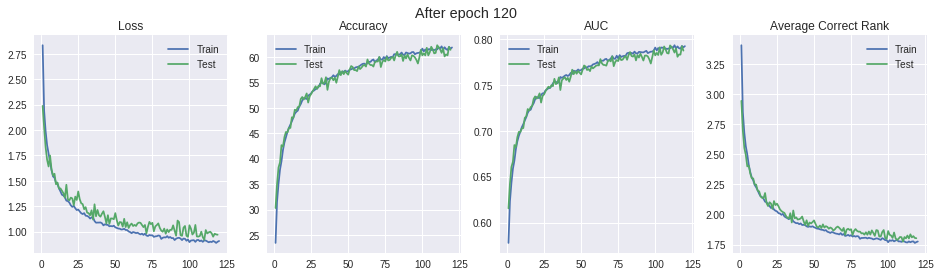

2018-12-19 21:52:34: After epoch 121, TRAIN acc is 62.2353,  loss is 0.8882, AUC is 0.7937, and correct rank is 1.7642
2018-12-19 21:52:41: After epoch 121, TEST acc is 62.2000, loss is 0.9354, AUC is 0.7933, and correct rank is 1.7757
2018-12-19 21:53:14: After epoch 122, TRAIN acc is 62.1688,  loss is 0.8935, AUC is 0.7933, and correct rank is 1.7651
2018-12-19 21:53:22: After epoch 122, TEST acc is 60.8000, loss is 0.9777, AUC is 0.7849, and correct rank is 1.8262
2018-12-19 21:53:55: After epoch 123, TRAIN acc is 62.0307,  loss is 0.8853, AUC is 0.7929, and correct rank is 1.7642
2018-12-19 21:54:03: After epoch 123, TEST acc is 61.4000, loss is 0.9545, AUC is 0.7880, and correct rank is 1.8096
2018-12-19 21:54:36: After epoch 124, TRAIN acc is 61.5601,  loss is 0.8830, AUC is 0.7900, and correct rank is 1.7636
2018-12-19 21:54:43: After epoch 124, TEST acc is 60.6000, loss is 0.9405, AUC is 0.7841, and correct rank is 1.8032
2018-12-19 21:55:16: After epoch 125, TRAIN acc is 62.07

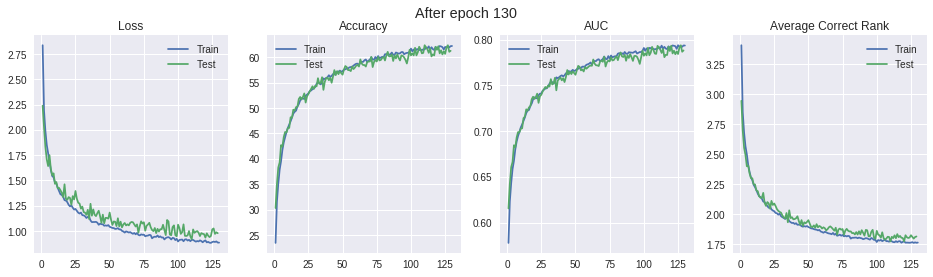

2018-12-19 21:59:18: After epoch 131, TRAIN acc is 62.9054,  loss is 0.8606, AUC is 0.7973, and correct rank is 1.7419
2018-12-19 21:59:25: After epoch 131, TEST acc is 61.7000, loss is 0.9812, AUC is 0.7907, and correct rank is 1.7920
2018-12-19 21:59:58: After epoch 132, TRAIN acc is 62.3504,  loss is 0.8905, AUC is 0.7941, and correct rank is 1.7579
Epoch    12: reducing learning rate of group 0 to 5.0000e-04.
2018-12-19 22:00:06: After epoch 132, TEST acc is 61.8000, loss is 0.9822, AUC is 0.7913, and correct rank is 1.8080
2018-12-19 22:00:39: After epoch 133, TRAIN acc is 63.3299,  loss is 0.8414, AUC is 0.8002, and correct rank is 1.7314
2018-12-19 22:00:46: After epoch 133, TEST acc is 62.2000, loss is 0.9108, AUC is 0.7930, and correct rank is 1.7817
2018-12-19 22:01:18: After epoch 134, TRAIN acc is 63.5371,  loss is 0.8215, AUC is 0.8010, and correct rank is 1.7177
2018-12-19 22:01:27: After epoch 134, TEST acc is 62.7000, loss is 0.9447, AUC is 0.7959, and correct rank is 1

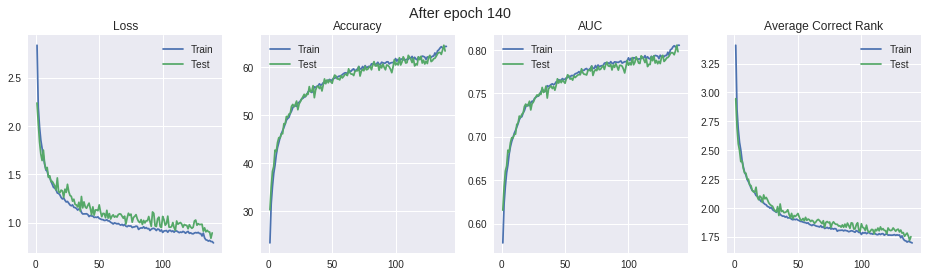

2018-12-19 22:06:01: After epoch 141, TRAIN acc is 64.2737,  loss is 0.8095, AUC is 0.8048, and correct rank is 1.7019
2018-12-19 22:06:08: After epoch 141, TEST acc is 62.4000, loss is 0.9363, AUC is 0.7936, and correct rank is 1.7830
2018-12-19 22:06:40: After epoch 142, TRAIN acc is 64.4808,  loss is 0.7973, AUC is 0.8066, and correct rank is 1.6987
2018-12-19 22:06:48: After epoch 142, TEST acc is 62.5000, loss is 0.9537, AUC is 0.7952, and correct rank is 1.7826
2018-12-19 22:07:21: After epoch 143, TRAIN acc is 64.5141,  loss is 0.7944, AUC is 0.8067, and correct rank is 1.6936
2018-12-19 22:07:27: After epoch 143, TEST acc is 63.0000, loss is 0.8894, AUC is 0.7972, and correct rank is 1.7530
2018-12-19 22:08:00: After epoch 144, TRAIN acc is 64.5831,  loss is 0.7876, AUC is 0.8067, and correct rank is 1.6919
2018-12-19 22:08:08: After epoch 144, TEST acc is 62.7000, loss is 0.9244, AUC is 0.7964, and correct rank is 1.7668
2018-12-19 22:08:41: After epoch 145, TRAIN acc is 64.51

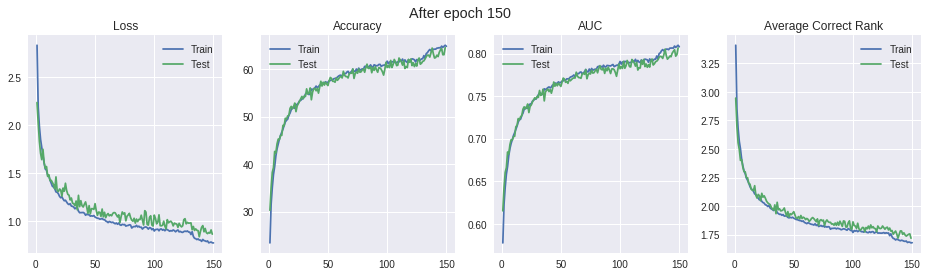

2018-12-19 22:14:23: After epoch 151, TRAIN acc is 65.5192,  loss is 0.7555, AUC is 0.8118, and correct rank is 1.6691
2018-12-19 22:14:31: After epoch 151, TEST acc is 64.9000, loss is 0.8657, AUC is 0.8086, and correct rank is 1.7224
2018-12-19 22:15:04: After epoch 152, TRAIN acc is 65.7621,  loss is 0.7530, AUC is 0.8129, and correct rank is 1.6636
2018-12-19 22:15:11: After epoch 152, TEST acc is 65.0000, loss is 0.8541, AUC is 0.8077, and correct rank is 1.7197
2018-12-19 22:15:44: After epoch 153, TRAIN acc is 65.5038,  loss is 0.7571, AUC is 0.8119, and correct rank is 1.6665
2018-12-19 22:15:51: After epoch 153, TEST acc is 64.5000, loss is 0.8646, AUC is 0.8045, and correct rank is 1.7219
2018-12-19 22:16:24: After epoch 154, TRAIN acc is 65.5064,  loss is 0.7431, AUC is 0.8121, and correct rank is 1.6605
2018-12-19 22:16:31: After epoch 154, TEST acc is 64.7000, loss is 0.8828, AUC is 0.8063, and correct rank is 1.7270
2018-12-19 22:17:04: After epoch 155, TRAIN acc is 65.74

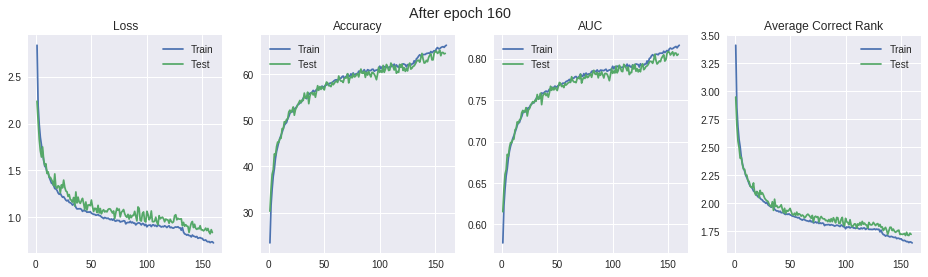

2018-12-19 22:21:07: After epoch 161, TRAIN acc is 66.1790,  loss is 0.7314, AUC is 0.8155, and correct rank is 1.6477
2018-12-19 22:21:15: After epoch 161, TEST acc is 65.5000, loss is 0.8147, AUC is 0.8102, and correct rank is 1.7002
2018-12-19 22:21:48: After epoch 162, TRAIN acc is 66.1535,  loss is 0.7295, AUC is 0.8157, and correct rank is 1.6484
2018-12-19 22:21:55: After epoch 162, TEST acc is 64.8000, loss is 0.8476, AUC is 0.8066, and correct rank is 1.7095
2018-12-19 22:22:28: After epoch 163, TRAIN acc is 66.5703,  loss is 0.7284, AUC is 0.8177, and correct rank is 1.6417
2018-12-19 22:22:35: After epoch 163, TEST acc is 65.1000, loss is 0.8716, AUC is 0.8092, and correct rank is 1.7272
2018-12-19 22:23:08: After epoch 164, TRAIN acc is 66.5013,  loss is 0.7269, AUC is 0.8178, and correct rank is 1.6460
2018-12-19 22:23:15: After epoch 164, TEST acc is 65.5000, loss is 0.8396, AUC is 0.8100, and correct rank is 1.7093
2018-12-19 22:23:48: After epoch 165, TRAIN acc is 66.07

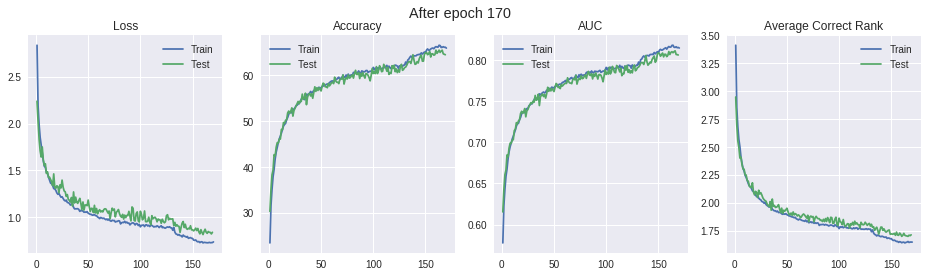

2018-12-19 22:27:51: After epoch 171, TRAIN acc is 66.2762,  loss is 0.7175, AUC is 0.8166, and correct rank is 1.6413
2018-12-19 22:27:58: After epoch 171, TEST acc is 65.2000, loss is 0.8630, AUC is 0.8097, and correct rank is 1.7085
2018-12-19 22:28:31: After epoch 172, TRAIN acc is 66.1330,  loss is 0.7240, AUC is 0.8148, and correct rank is 1.6479
Epoch    52: reducing learning rate of group 0 to 1.2500e-04.
2018-12-19 22:28:38: After epoch 172, TEST acc is 64.9000, loss is 0.8415, AUC is 0.8073, and correct rank is 1.7152
2018-12-19 22:29:11: After epoch 173, TRAIN acc is 66.4936,  loss is 0.7076, AUC is 0.8172, and correct rank is 1.6315
2018-12-19 22:29:18: After epoch 173, TEST acc is 65.6000, loss is 0.8182, AUC is 0.8109, and correct rank is 1.6989
2018-12-19 22:29:51: After epoch 174, TRAIN acc is 66.6240,  loss is 0.7125, AUC is 0.8178, and correct rank is 1.6379
2018-12-19 22:29:57: After epoch 174, TEST acc is 66.0000, loss is 0.8360, AUC is 0.8145, and correct rank is 1

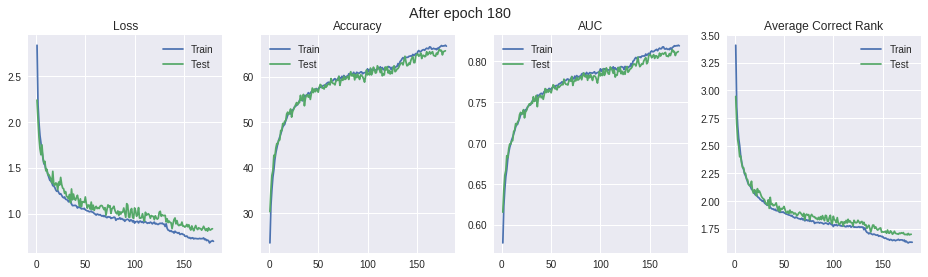

2018-12-19 22:34:33: After epoch 181, TRAIN acc is 66.6726,  loss is 0.6992, AUC is 0.8186, and correct rank is 1.6290
2018-12-19 22:34:42: After epoch 181, TEST acc is 65.0000, loss is 0.8601, AUC is 0.8081, and correct rank is 1.7187
2018-12-19 22:35:15: After epoch 182, TRAIN acc is 67.0537,  loss is 0.6951, AUC is 0.8207, and correct rank is 1.6236
2018-12-19 22:35:21: After epoch 182, TEST acc is 65.4000, loss is 0.8343, AUC is 0.8097, and correct rank is 1.6938
2018-12-19 22:35:55: After epoch 183, TRAIN acc is 67.2148,  loss is 0.6966, AUC is 0.8216, and correct rank is 1.6252
2018-12-19 22:36:03: After epoch 183, TEST acc is 65.6000, loss is 0.8200, AUC is 0.8108, and correct rank is 1.6939
2018-12-19 22:36:36: After epoch 184, TRAIN acc is 67.1176,  loss is 0.6933, AUC is 0.8205, and correct rank is 1.6205
2018-12-19 22:36:43: After epoch 184, TEST acc is 65.5000, loss is 0.7947, AUC is 0.8118, and correct rank is 1.6955
2018-12-19 22:37:16: After epoch 185, TRAIN acc is 66.79

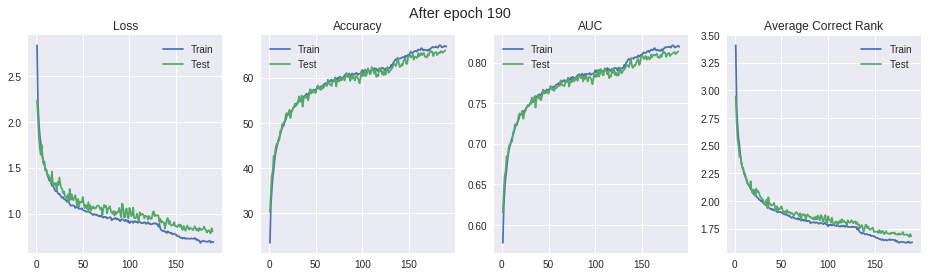

2018-12-19 22:41:18: After epoch 191, TRAIN acc is 67.2072,  loss is 0.6900, AUC is 0.8214, and correct rank is 1.6179
2018-12-19 22:41:26: After epoch 191, TEST acc is 65.6000, loss is 0.7853, AUC is 0.8117, and correct rank is 1.6847
2018-12-19 22:41:59: After epoch 192, TRAIN acc is 67.0818,  loss is 0.6953, AUC is 0.8210, and correct rank is 1.6240
2018-12-19 22:42:06: After epoch 192, TEST acc is 66.2000, loss is 0.7874, AUC is 0.8154, and correct rank is 1.6730
2018-12-19 22:42:38: After epoch 193, TRAIN acc is 66.8696,  loss is 0.6901, AUC is 0.8195, and correct rank is 1.6233
2018-12-19 22:42:46: After epoch 193, TEST acc is 64.9000, loss is 0.8221, AUC is 0.8083, and correct rank is 1.7014
2018-12-19 22:43:19: After epoch 194, TRAIN acc is 67.5934,  loss is 0.6878, AUC is 0.8235, and correct rank is 1.6118
2018-12-19 22:43:25: After epoch 194, TEST acc is 65.8000, loss is 0.8331, AUC is 0.8119, and correct rank is 1.6988
2018-12-19 22:43:58: After epoch 195, TRAIN acc is 67.08

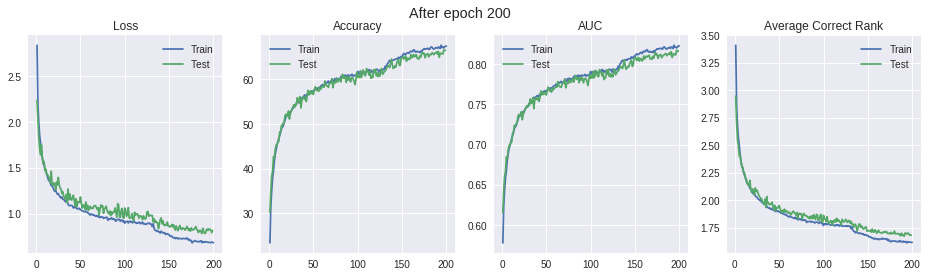

In [0]:
total_epochs = 200
wandb.config.update(dict(epochs=total_epochs), allow_val_change=True)

train(hinge_squared_dendrogram_margin_loss_cnn_mlp, train_dataloader, test_dataloader, 
      num_epochs=total_epochs - current_epoch, epochs_to_test=1, epochs_to_graph=10, 
      num_batches_to_print=2000, start_epoch=current_epoch)

## Let's try training with a nonsensical dendrogram

To see if it has any effect

In [0]:
alphabetical_edge_dicts = {
    'root': {'a-d': {'weight': 1}, 'f-z': {'weight': 1} },
    'a-d': {'a-c': {'weight': 1}, 'd': {'weight': 1}},
    'a-c': {'bird': {'weight': 1}, 'auto': {'weight': 1}, 'cat': {'weight': 1}},
    'd': {'deer': {'weight': 1}, 'dog': {'weight': 1}},
    'f-z': {'f-p': {'weight': 1}, 'q-z': {'weight': 1}},
    'f-p': {'frog': {'weight': 1}, 'horse': {'weight': 1}, 'airplane': {'weight': 1}},
    'q-z': {'ship': {'weight': 1}, 'truck': {'weight': 1}}
}

actual_classes = ('airplane', 'auto', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

alphabetical_dendrogram_loss = DendrogramLoss(alphabetical_edge_dicts, actual_classes)
alphabetical_dendrogram_loss = alphabetical_dendrogram_loss.cuda()
alphabetical_dendrogram_loss.distances

tensor([[1., 7., 7., 7., 7., 7., 3., 3., 5., 5.],
        [7., 1., 3., 3., 5., 5., 7., 7., 7., 7.],
        [7., 3., 1., 3., 5., 5., 7., 7., 7., 7.],
        [7., 3., 3., 1., 5., 5., 7., 7., 7., 7.],
        [7., 5., 5., 5., 1., 3., 7., 7., 7., 7.],
        [7., 5., 5., 5., 3., 1., 7., 7., 7., 7.],
        [3., 7., 7., 7., 7., 7., 1., 3., 5., 5.],
        [3., 7., 7., 7., 7., 7., 3., 1., 5., 5.],
        [5., 7., 7., 7., 7., 7., 5., 5., 1., 3.],
        [5., 7., 7., 7., 7., 7., 5., 5., 3., 1.]], device='cuda:0')

In [0]:
current_epoch = 200

alphabetical_hinge_dendrogram_margin_loss = HingeDendrogramLoss(alphabetical_edge_dicts, actual_classes, p=2)
alphabetical_hinge_dendrogram_margin_loss = alphabetical_hinge_dendrogram_margin_loss.cuda()

alphabetical_hinge_squared_dendrogram_loss_cnn_mlp = PoolingDropoutCNN_MLP(
    conv_filter_sizes=(16, 32, 48, 64),
    conv_output_size=256, 
    mlp_layer_sizes=(512, 512, 512, 512),
    lr=1e-3, 
    weight_decay=1e-4, 
    use_mse=False,
    loss=alphabetical_hinge_dendrogram_margin_loss,
    name='alphabetical_hinge_squared_dendrogram_loss_cnn_mlp')
alphabetical_hinge_squared_dendrogram_loss_cnn_mlp.load_model(current_epoch)
alphabetical_hinge_squared_dendrogram_loss_cnn_mlp = alphabetical_hinge_squared_dendrogram_loss_cnn_mlp.cuda()

512


In [0]:
os.environ['WANDB_RUN_ID'] ='xtsq18nx'
os.environ['WANDB_RESUME'] = 'must'
wandb.init(project="dendrogram-loss")

current_model = alphabetical_hinge_squared_dendrogram_loss_cnn_mlp

# wandb.config.epochs = 100
wandb.config.lr = current_model.lr
wandb.config.decay = current_model.weight_decay
wandb.config.loss = 'Dednrogram hinge squared with alphabetical dendrogram' #current_model.use_mse and 'MSE' or 'CE'
wandb.config.batch_size = train_dataloader.batch_size
wandb.config.description = 'Standard CNN-MLP convolutional model with hinge squared dendrogram loss from nonscensical (alphabetical) dendrogram'

W&B Run: https://app.wandb.ai/guy/dendrogram-loss/runs/xtsq18nx
Call `%%wandb` in the cell containing your training loop to display live results.


2018-12-19 22:59:48: After epoch 1, TRAIN acc is 27.4143,  loss is 3.4186, AUC is 0.5997, and correct rank is 3.2720
2018-12-19 22:59:56: After epoch 1, TEST acc is 35.3000, loss is 2.8284, AUC is 0.6434, and correct rank is 2.7683
Resuming run: https://app.wandb.ai/guy/dendrogram-loss/runs/xtsq18nx
2018-12-19 23:00:30: After epoch 2, TRAIN acc is 36.6829,  loss is 2.7409, AUC is 0.6507, and correct rank is 2.6949
2018-12-19 23:00:37: After epoch 2, TEST acc is 40.0000, loss is 2.5470, AUC is 0.6682, and correct rank is 2.5662
2018-12-19 23:01:10: After epoch 3, TRAIN acc is 40.6138,  loss is 2.4996, AUC is 0.6740, and correct rank is 2.5260
2018-12-19 23:01:18: After epoch 3, TEST acc is 43.2000, loss is 2.3101, AUC is 0.6874, and correct rank is 2.3990
2018-12-19 23:01:51: After epoch 4, TRAIN acc is 43.2404,  loss is 2.3266, AUC is 0.6876, and correct rank is 2.4041
2018-12-19 23:01:58: After epoch 4, TEST acc is 45.0000, loss is 2.2567, AUC is 0.6972, and correct rank is 2.3664
201

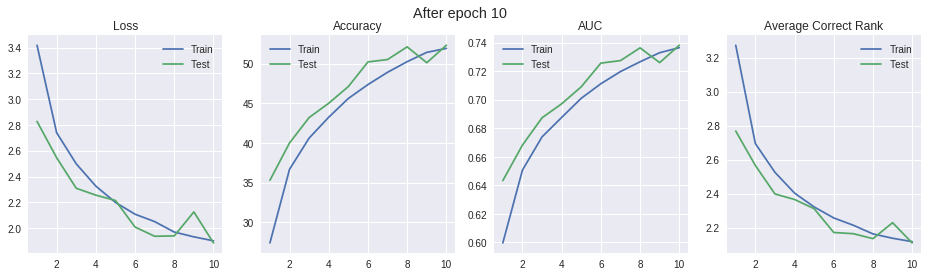

2018-12-19 23:06:29: After epoch 11, TRAIN acc is 53.2455,  loss is 1.8380, AUC is 0.7434, and correct rank is 2.0809
2018-12-19 23:06:40: After epoch 11, TEST acc is 53.9000, loss is 1.8706, AUC is 0.7464, and correct rank is 2.0919
2018-12-19 23:07:13: After epoch 12, TRAIN acc is 53.5934,  loss is 1.8229, AUC is 0.7458, and correct rank is 2.0635
2018-12-19 23:07:19: After epoch 12, TEST acc is 54.6000, loss is 1.8409, AUC is 0.7498, and correct rank is 2.0631
2018-12-19 23:07:52: After epoch 13, TRAIN acc is 54.5115,  loss is 1.7927, AUC is 0.7506, and correct rank is 2.0443
2018-12-19 23:07:59: After epoch 13, TEST acc is 55.9000, loss is 1.7830, AUC is 0.7579, and correct rank is 2.0209
2018-12-19 23:08:32: After epoch 14, TRAIN acc is 54.6752,  loss is 1.7604, AUC is 0.7516, and correct rank is 2.0311
2018-12-19 23:08:39: After epoch 14, TEST acc is 56.1000, loss is 1.8001, AUC is 0.7590, and correct rank is 2.0420
2018-12-19 23:09:12: After epoch 15, TRAIN acc is 55.3350,  loss

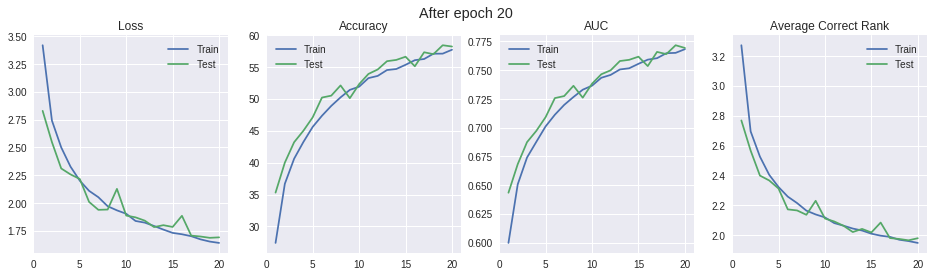

2018-12-19 23:13:12: After epoch 21, TRAIN acc is 58.3248,  loss is 1.6149, AUC is 0.7723, and correct rank is 1.9311
2018-12-19 23:13:19: After epoch 21, TEST acc is 58.2000, loss is 1.7073, AUC is 0.7696, and correct rank is 1.9752
2018-12-19 23:13:52: After epoch 22, TRAIN acc is 58.9156,  loss is 1.5788, AUC is 0.7747, and correct rank is 1.9102
2018-12-19 23:13:59: After epoch 22, TEST acc is 59.4000, loss is 1.6330, AUC is 0.7763, and correct rank is 1.9442
2018-12-19 23:14:32: After epoch 23, TRAIN acc is 58.6343,  loss is 1.5962, AUC is 0.7739, and correct rank is 1.9203
2018-12-19 23:14:39: After epoch 23, TEST acc is 57.6000, loss is 1.7422, AUC is 0.7669, and correct rank is 2.0018
2018-12-19 23:15:12: After epoch 24, TRAIN acc is 58.8031,  loss is 1.5800, AUC is 0.7746, and correct rank is 1.9152
2018-12-19 23:15:18: After epoch 24, TEST acc is 59.3000, loss is 1.5908, AUC is 0.7768, and correct rank is 1.9183
2018-12-19 23:15:51: After epoch 25, TRAIN acc is 59.5192,  loss

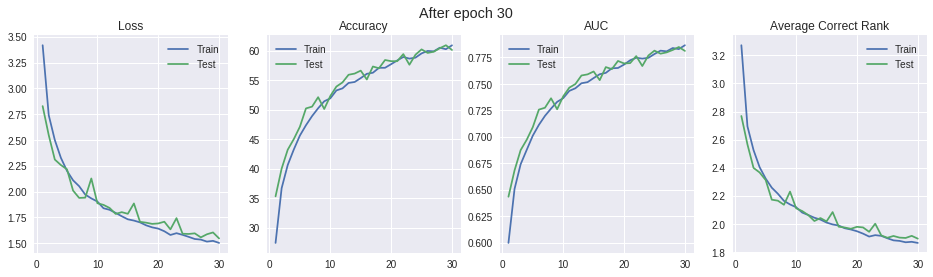

2018-12-19 23:19:51: After epoch 31, TRAIN acc is 60.8389,  loss is 1.4906, AUC is 0.7861, and correct rank is 1.8579
2018-12-19 23:19:58: After epoch 31, TEST acc is 60.8000, loss is 1.5622, AUC is 0.7853, and correct rank is 1.8948
2018-12-19 23:20:31: After epoch 32, TRAIN acc is 61.4220,  loss is 1.4806, AUC is 0.7891, and correct rank is 1.8454
2018-12-19 23:20:38: After epoch 32, TEST acc is 61.3000, loss is 1.5333, AUC is 0.7875, and correct rank is 1.8739
2018-12-19 23:21:11: After epoch 33, TRAIN acc is 61.4552,  loss is 1.4530, AUC is 0.7891, and correct rank is 1.8359
2018-12-19 23:21:18: After epoch 33, TEST acc is 61.8000, loss is 1.5157, AUC is 0.7901, and correct rank is 1.8630
2018-12-19 23:21:51: After epoch 34, TRAIN acc is 61.5294,  loss is 1.4619, AUC is 0.7900, and correct rank is 1.8394
2018-12-19 23:21:57: After epoch 34, TEST acc is 61.9000, loss is 1.4858, AUC is 0.7915, and correct rank is 1.8367
2018-12-19 23:22:30: After epoch 35, TRAIN acc is 61.6343,  loss

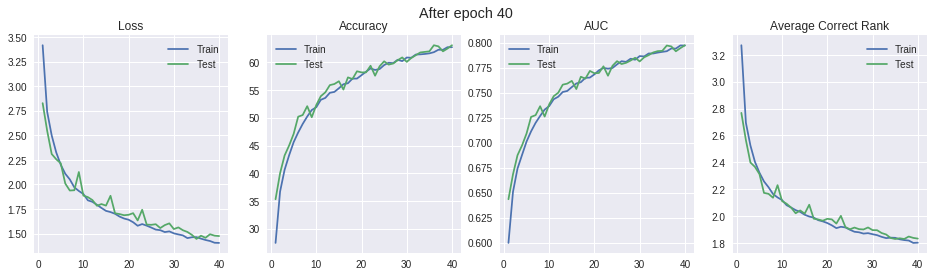

2018-12-19 23:26:32: After epoch 41, TRAIN acc is 62.7263,  loss is 1.4154, AUC is 0.7963, and correct rank is 1.8079
2018-12-19 23:26:40: After epoch 41, TEST acc is 63.0000, loss is 1.4242, AUC is 0.7967, and correct rank is 1.8120
2018-12-19 23:27:13: After epoch 42, TRAIN acc is 62.6215,  loss is 1.4039, AUC is 0.7964, and correct rank is 1.8045
2018-12-19 23:27:20: After epoch 42, TEST acc is 62.9000, loss is 1.4582, AUC is 0.7958, and correct rank is 1.8329
2018-12-19 23:27:53: After epoch 43, TRAIN acc is 62.9795,  loss is 1.3952, AUC is 0.7981, and correct rank is 1.7982
2018-12-19 23:28:00: After epoch 43, TEST acc is 63.5000, loss is 1.4172, AUC is 0.7996, and correct rank is 1.8087
2018-12-19 23:28:34: After epoch 44, TRAIN acc is 63.2711,  loss is 1.3783, AUC is 0.8000, and correct rank is 1.7849
2018-12-19 23:28:40: After epoch 44, TEST acc is 63.6000, loss is 1.4126, AUC is 0.7999, and correct rank is 1.8066
2018-12-19 23:29:13: After epoch 45, TRAIN acc is 63.2379,  loss

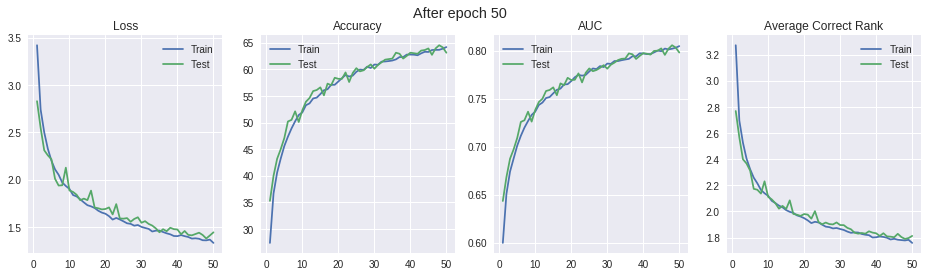

2018-12-19 23:33:13: After epoch 51, TRAIN acc is 64.2813,  loss is 1.3433, AUC is 0.8053, and correct rank is 1.7622
2018-12-19 23:33:20: After epoch 51, TEST acc is 63.1000, loss is 1.5342, AUC is 0.7966, and correct rank is 1.8484
2018-12-19 23:33:53: After epoch 52, TRAIN acc is 64.3478,  loss is 1.3361, AUC is 0.8059, and correct rank is 1.7619
2018-12-19 23:33:59: After epoch 52, TEST acc is 63.9000, loss is 1.4276, AUC is 0.8019, and correct rank is 1.8050
2018-12-19 23:34:33: After epoch 53, TRAIN acc is 64.3299,  loss is 1.3422, AUC is 0.8059, and correct rank is 1.7615
2018-12-19 23:34:40: After epoch 53, TEST acc is 64.5000, loss is 1.4049, AUC is 0.8051, and correct rank is 1.7846
2018-12-19 23:35:13: After epoch 54, TRAIN acc is 64.4373,  loss is 1.3308, AUC is 0.8058, and correct rank is 1.7530
2018-12-19 23:35:20: After epoch 54, TEST acc is 64.4000, loss is 1.3854, AUC is 0.8055, and correct rank is 1.7797
2018-12-19 23:35:53: After epoch 55, TRAIN acc is 64.5934,  loss

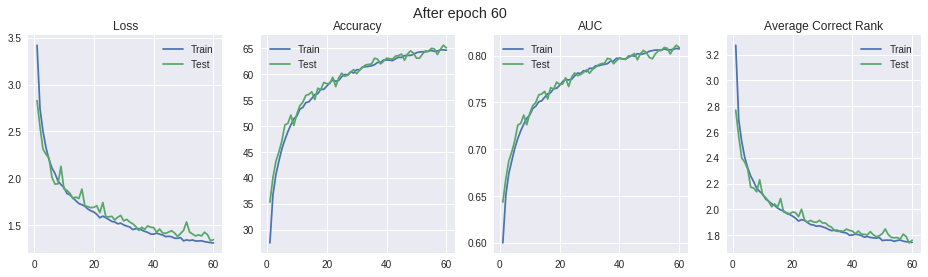

2018-12-19 23:39:55: After epoch 61, TRAIN acc is 64.9668,  loss is 1.3123, AUC is 0.8092, and correct rank is 1.7435
2018-12-19 23:40:02: After epoch 61, TEST acc is 64.5000, loss is 1.3983, AUC is 0.8057, and correct rank is 1.7845
2018-12-19 23:40:35: After epoch 62, TRAIN acc is 65.2302,  loss is 1.3076, AUC is 0.8099, and correct rank is 1.7412
2018-12-19 23:40:42: After epoch 62, TEST acc is 64.3000, loss is 1.3602, AUC is 0.8049, and correct rank is 1.7740
2018-12-19 23:41:15: After epoch 63, TRAIN acc is 65.1125,  loss is 1.3061, AUC is 0.8097, and correct rank is 1.7405
2018-12-19 23:41:22: After epoch 63, TEST acc is 65.1000, loss is 1.3565, AUC is 0.8094, and correct rank is 1.7654
2018-12-19 23:41:55: After epoch 64, TRAIN acc is 65.2941,  loss is 1.3059, AUC is 0.8110, and correct rank is 1.7423
2018-12-19 23:42:01: After epoch 64, TEST acc is 64.9000, loss is 1.3348, AUC is 0.8075, and correct rank is 1.7521
2018-12-19 23:42:34: After epoch 65, TRAIN acc is 65.3325,  loss

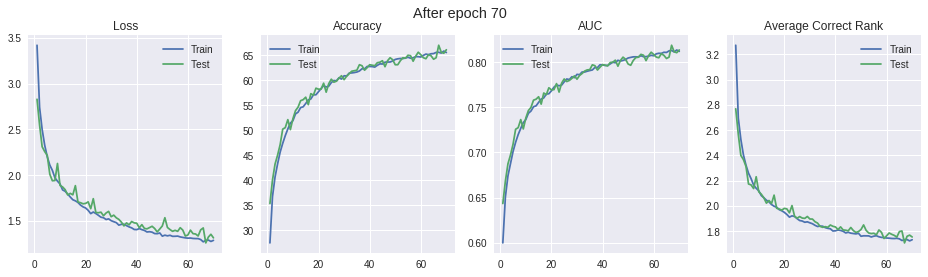

2018-12-19 23:46:34: After epoch 71, TRAIN acc is 65.2379,  loss is 1.3040, AUC is 0.8102, and correct rank is 1.7392
2018-12-19 23:46:42: After epoch 71, TEST acc is 65.1000, loss is 1.3586, AUC is 0.8083, and correct rank is 1.7728
2018-12-19 23:47:15: After epoch 72, TRAIN acc is 65.6164,  loss is 1.2788, AUC is 0.8128, and correct rank is 1.7244
2018-12-19 23:47:22: After epoch 72, TEST acc is 65.4000, loss is 1.3511, AUC is 0.8105, and correct rank is 1.7638
2018-12-19 23:47:55: After epoch 73, TRAIN acc is 65.7826,  loss is 1.2776, AUC is 0.8139, and correct rank is 1.7216
2018-12-19 23:48:03: After epoch 73, TEST acc is 65.9000, loss is 1.3590, AUC is 0.8134, and correct rank is 1.7724
2018-12-19 23:48:36: After epoch 74, TRAIN acc is 65.9028,  loss is 1.2693, AUC is 0.8140, and correct rank is 1.7188
2018-12-19 23:48:43: After epoch 74, TEST acc is 66.1000, loss is 1.3127, AUC is 0.8142, and correct rank is 1.7335
2018-12-19 23:49:16: After epoch 75, TRAIN acc is 65.9642,  loss

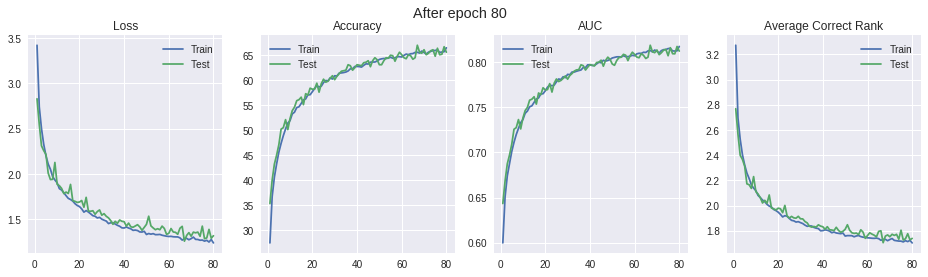

2018-12-19 23:53:16: After epoch 81, TRAIN acc is 66.0997,  loss is 1.2641, AUC is 0.8153, and correct rank is 1.7143
2018-12-19 23:53:23: After epoch 81, TEST acc is 66.2000, loss is 1.3449, AUC is 0.8136, and correct rank is 1.7494
2018-12-19 23:53:56: After epoch 82, TRAIN acc is 66.5729,  loss is 1.2409, AUC is 0.8184, and correct rank is 1.7017
2018-12-19 23:54:02: After epoch 82, TEST acc is 65.5000, loss is 1.3833, AUC is 0.8110, and correct rank is 1.7692
2018-12-19 23:54:36: After epoch 83, TRAIN acc is 66.0614,  loss is 1.2565, AUC is 0.8145, and correct rank is 1.7127
2018-12-19 23:54:44: After epoch 83, TEST acc is 66.2000, loss is 1.2980, AUC is 0.8156, and correct rank is 1.7274
2018-12-19 23:55:17: After epoch 84, TRAIN acc is 66.2020,  loss is 1.2520, AUC is 0.8163, and correct rank is 1.7112
2018-12-19 23:55:24: After epoch 84, TEST acc is 67.0000, loss is 1.2780, AUC is 0.8193, and correct rank is 1.7172
2018-12-19 23:55:58: After epoch 85, TRAIN acc is 66.2072,  loss

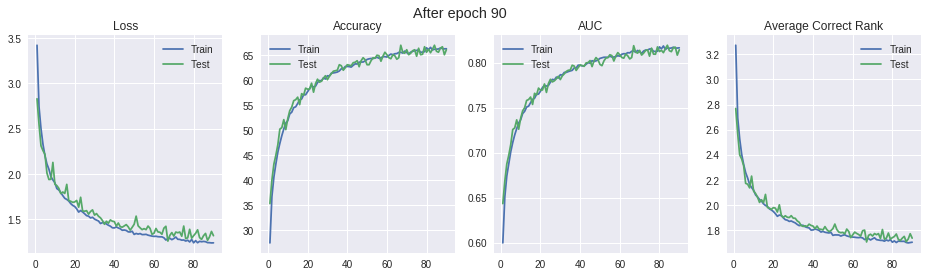

2018-12-20 00:00:01: After epoch 91, TRAIN acc is 66.5934,  loss is 1.2402, AUC is 0.8178, and correct rank is 1.7056
2018-12-20 00:00:09: After epoch 91, TEST acc is 66.2000, loss is 1.3033, AUC is 0.8153, and correct rank is 1.7478
2018-12-20 00:00:42: After epoch 92, TRAIN acc is 66.7775,  loss is 1.2311, AUC is 0.8194, and correct rank is 1.6966
2018-12-20 00:00:48: After epoch 92, TEST acc is 67.1000, loss is 1.2558, AUC is 0.8198, and correct rank is 1.7047
2018-12-20 00:01:21: After epoch 93, TRAIN acc is 67.0767,  loss is 1.2260, AUC is 0.8211, and correct rank is 1.6903
2018-12-20 00:01:29: After epoch 93, TEST acc is 65.9000, loss is 1.3928, AUC is 0.8129, and correct rank is 1.7816
2018-12-20 00:02:02: After epoch 94, TRAIN acc is 66.4808,  loss is 1.2332, AUC is 0.8169, and correct rank is 1.6972
2018-12-20 00:02:08: After epoch 94, TEST acc is 66.6000, loss is 1.2762, AUC is 0.8177, and correct rank is 1.7165
2018-12-20 00:02:42: After epoch 95, TRAIN acc is 66.6880,  loss

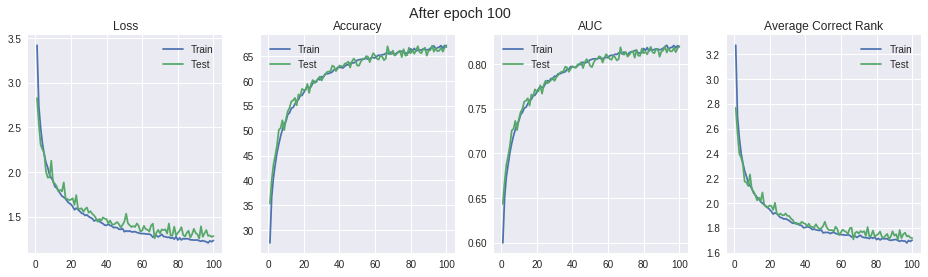

2018-12-20 00:06:44: After epoch 101, TRAIN acc is 67.0563,  loss is 1.2188, AUC is 0.8208, and correct rank is 1.6851
2018-12-20 00:06:51: After epoch 101, TEST acc is 65.5000, loss is 1.3770, AUC is 0.8110, and correct rank is 1.7762
2018-12-20 00:07:24: After epoch 102, TRAIN acc is 66.6547,  loss is 1.2282, AUC is 0.8189, and correct rank is 1.6920
2018-12-20 00:07:31: After epoch 102, TEST acc is 66.3000, loss is 1.3043, AUC is 0.8153, and correct rank is 1.7420
2018-12-20 00:08:04: After epoch 103, TRAIN acc is 66.9949,  loss is 1.2170, AUC is 0.8203, and correct rank is 1.6899
2018-12-20 00:08:11: After epoch 103, TEST acc is 66.5000, loss is 1.2836, AUC is 0.8170, and correct rank is 1.7297
2018-12-20 00:08:44: After epoch 104, TRAIN acc is 67.0256,  loss is 1.2211, AUC is 0.8215, and correct rank is 1.6889
2018-12-20 00:08:50: After epoch 104, TEST acc is 66.0000, loss is 1.2783, AUC is 0.8145, and correct rank is 1.7211
2018-12-20 00:09:23: After epoch 105, TRAIN acc is 67.01

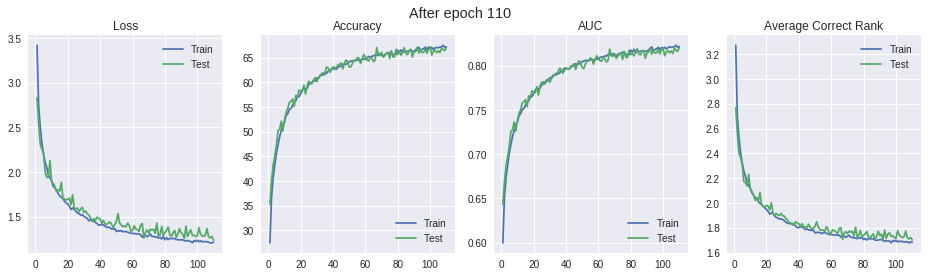

2018-12-20 00:13:23: After epoch 111, TRAIN acc is 67.2199,  loss is 1.1940, AUC is 0.8215, and correct rank is 1.6755
2018-12-20 00:13:30: After epoch 111, TEST acc is 66.1000, loss is 1.3381, AUC is 0.8146, and correct rank is 1.7463
2018-12-20 00:14:04: After epoch 112, TRAIN acc is 67.0972,  loss is 1.2118, AUC is 0.8213, and correct rank is 1.6809
2018-12-20 00:14:10: After epoch 112, TEST acc is 67.2000, loss is 1.2593, AUC is 0.8209, and correct rank is 1.7070
2018-12-20 00:14:44: After epoch 113, TRAIN acc is 67.1867,  loss is 1.1947, AUC is 0.8212, and correct rank is 1.6747
2018-12-20 00:14:51: After epoch 113, TEST acc is 66.8000, loss is 1.2362, AUC is 0.8186, and correct rank is 1.6980
2018-12-20 00:15:24: After epoch 114, TRAIN acc is 67.1279,  loss is 1.2014, AUC is 0.8214, and correct rank is 1.6794
2018-12-20 00:15:31: After epoch 114, TEST acc is 66.4000, loss is 1.2990, AUC is 0.8166, and correct rank is 1.7261
2018-12-20 00:16:05: After epoch 115, TRAIN acc is 67.11

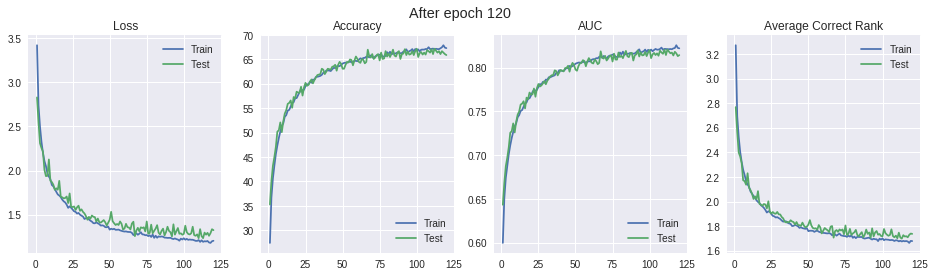

2018-12-20 00:20:05: After epoch 121, TRAIN acc is 67.4118,  loss is 1.2014, AUC is 0.8227, and correct rank is 1.6777
2018-12-20 00:20:12: After epoch 121, TEST acc is 66.2000, loss is 1.3350, AUC is 0.8147, and correct rank is 1.7417
2018-12-20 00:20:46: After epoch 122, TRAIN acc is 67.5703,  loss is 1.1940, AUC is 0.8234, and correct rank is 1.6747
2018-12-20 00:20:53: After epoch 122, TEST acc is 67.7000, loss is 1.2450, AUC is 0.8230, and correct rank is 1.7004
2018-12-20 00:21:25: After epoch 123, TRAIN acc is 67.4220,  loss is 1.2046, AUC is 0.8221, and correct rank is 1.6808
2018-12-20 00:21:33: After epoch 123, TEST acc is 67.7000, loss is 1.2487, AUC is 0.8222, and correct rank is 1.6965
2018-12-20 00:22:06: After epoch 124, TRAIN acc is 67.6854,  loss is 1.1885, AUC is 0.8239, and correct rank is 1.6688
2018-12-20 00:22:12: After epoch 124, TEST acc is 68.0000, loss is 1.2283, AUC is 0.8246, and correct rank is 1.6895
2018-12-20 00:22:45: After epoch 125, TRAIN acc is 67.53

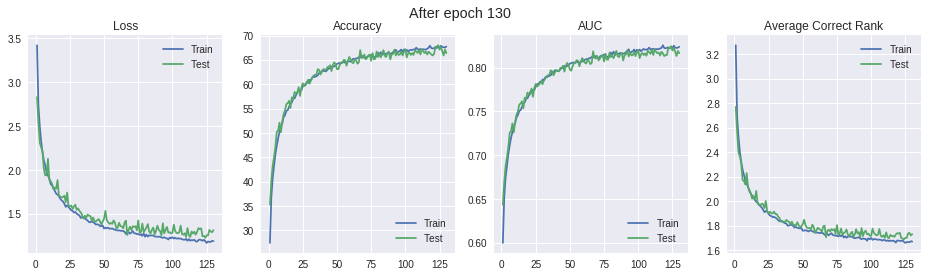

2018-12-20 00:26:48: After epoch 131, TRAIN acc is 67.5703,  loss is 1.1833, AUC is 0.8239, and correct rank is 1.6682
2018-12-20 00:26:56: After epoch 131, TEST acc is 67.7000, loss is 1.2093, AUC is 0.8237, and correct rank is 1.6767
2018-12-20 00:27:29: After epoch 132, TRAIN acc is 67.6317,  loss is 1.1821, AUC is 0.8241, and correct rank is 1.6655
2018-12-20 00:27:36: After epoch 132, TEST acc is 66.9000, loss is 1.2622, AUC is 0.8190, and correct rank is 1.7114
2018-12-20 00:28:09: After epoch 133, TRAIN acc is 67.7059,  loss is 1.1818, AUC is 0.8242, and correct rank is 1.6639
2018-12-20 00:28:17: After epoch 133, TEST acc is 67.8000, loss is 1.2505, AUC is 0.8235, and correct rank is 1.7015
2018-12-20 00:28:50: After epoch 134, TRAIN acc is 67.7033,  loss is 1.1882, AUC is 0.8246, and correct rank is 1.6716
2018-12-20 00:28:56: After epoch 134, TEST acc is 67.8000, loss is 1.2374, AUC is 0.8243, and correct rank is 1.6924
2018-12-20 00:29:29: After epoch 135, TRAIN acc is 67.89

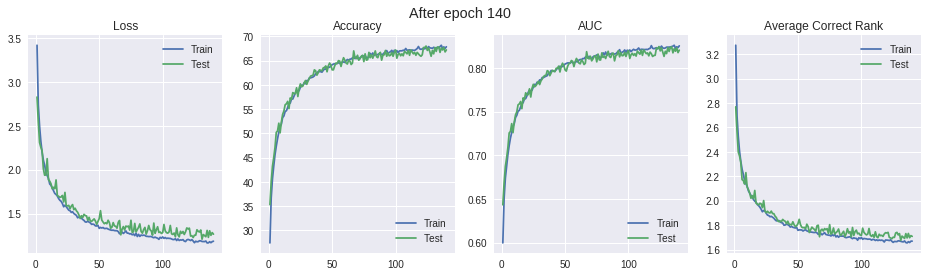

2018-12-20 00:33:32: After epoch 141, TRAIN acc is 67.9847,  loss is 1.1789, AUC is 0.8253, and correct rank is 1.6650
2018-12-20 00:33:40: After epoch 141, TEST acc is 68.1000, loss is 1.2274, AUC is 0.8249, and correct rank is 1.6887
2018-12-20 00:34:13: After epoch 142, TRAIN acc is 67.8542,  loss is 1.1701, AUC is 0.8251, and correct rank is 1.6587
Epoch    41: reducing learning rate of group 0 to 5.0000e-04.
2018-12-20 00:34:20: After epoch 142, TEST acc is 66.9000, loss is 1.2772, AUC is 0.8184, and correct rank is 1.7129
2018-12-20 00:34:53: After epoch 143, TRAIN acc is 68.7442,  loss is 1.1084, AUC is 0.8302, and correct rank is 1.6260
2018-12-20 00:35:00: After epoch 143, TEST acc is 68.7000, loss is 1.1729, AUC is 0.8286, and correct rank is 1.6566
2018-12-20 00:35:33: After epoch 144, TRAIN acc is 69.6061,  loss is 1.0954, AUC is 0.8343, and correct rank is 1.6166
2018-12-20 00:35:44: After epoch 144, TEST acc is 68.1000, loss is 1.1909, AUC is 0.8262, and correct rank is 1

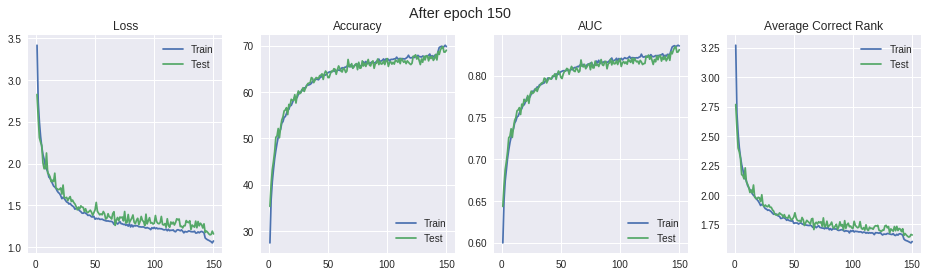

2018-12-20 00:40:30: After epoch 151, TRAIN acc is 69.9182,  loss is 1.0580, AUC is 0.8362, and correct rank is 1.5984
2018-12-20 00:40:39: After epoch 151, TEST acc is 68.4000, loss is 1.2018, AUC is 0.8275, and correct rank is 1.6726
2018-12-20 00:41:12: After epoch 152, TRAIN acc is 70.0691,  loss is 1.0529, AUC is 0.8374, and correct rank is 1.5957
2018-12-20 00:41:19: After epoch 152, TEST acc is 68.4000, loss is 1.2193, AUC is 0.8269, and correct rank is 1.6882
2018-12-20 00:41:52: After epoch 153, TRAIN acc is 69.9284,  loss is 1.0452, AUC is 0.8366, and correct rank is 1.5910
2018-12-20 00:41:59: After epoch 153, TEST acc is 68.9000, loss is 1.1343, AUC is 0.8300, and correct rank is 1.6449
2018-12-20 00:42:32: After epoch 154, TRAIN acc is 70.2225,  loss is 1.0438, AUC is 0.8384, and correct rank is 1.5879
2018-12-20 00:42:39: After epoch 154, TEST acc is 69.3000, loss is 1.1291, AUC is 0.8312, and correct rank is 1.6361
2018-12-20 00:43:12: After epoch 155, TRAIN acc is 70.12

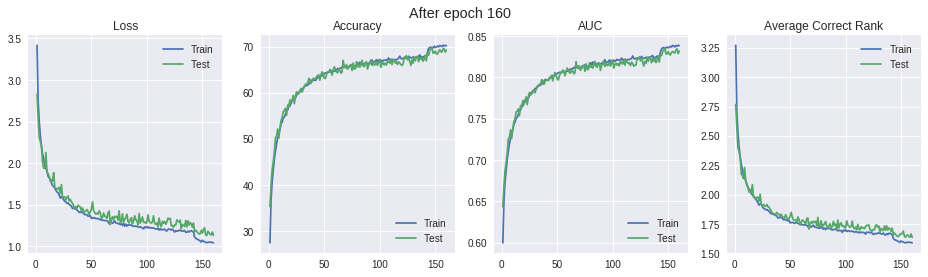

2018-12-20 00:47:18: After epoch 161, TRAIN acc is 70.3606,  loss is 1.0312, AUC is 0.8387, and correct rank is 1.5835
2018-12-20 00:47:30: After epoch 161, TEST acc is 69.5000, loss is 1.1224, AUC is 0.8329, and correct rank is 1.6339
2018-12-20 00:48:03: After epoch 162, TRAIN acc is 70.5678,  loss is 1.0257, AUC is 0.8403, and correct rank is 1.5810
2018-12-20 00:48:09: After epoch 162, TEST acc is 68.6000, loss is 1.1480, AUC is 0.8276, and correct rank is 1.6530
2018-12-20 00:48:42: After epoch 163, TRAIN acc is 70.3887,  loss is 1.0510, AUC is 0.8394, and correct rank is 1.5932
2018-12-20 00:48:49: After epoch 163, TEST acc is 70.1000, loss is 1.1391, AUC is 0.8364, and correct rank is 1.6405
2018-12-20 00:49:22: After epoch 164, TRAIN acc is 70.3069,  loss is 1.0450, AUC is 0.8385, and correct rank is 1.5921
2018-12-20 00:49:28: After epoch 164, TEST acc is 68.8000, loss is 1.1706, AUC is 0.8300, and correct rank is 1.6543
2018-12-20 00:50:02: After epoch 165, TRAIN acc is 70.51

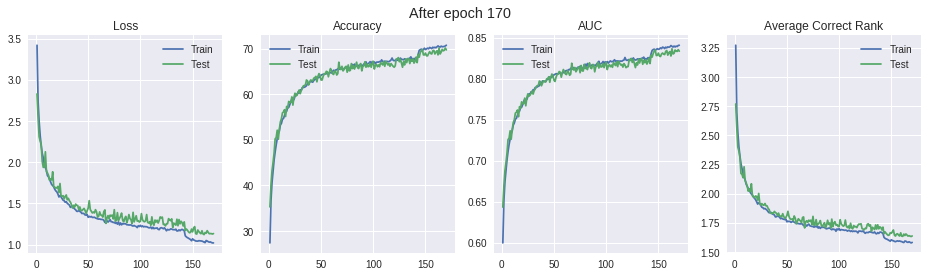

2018-12-20 00:54:04: After epoch 171, TRAIN acc is 70.6138,  loss is 1.0244, AUC is 0.8402, and correct rank is 1.5807
2018-12-20 00:54:12: After epoch 171, TEST acc is 69.0000, loss is 1.1419, AUC is 0.8308, and correct rank is 1.6459
2018-12-20 00:54:45: After epoch 172, TRAIN acc is 70.5396,  loss is 1.0296, AUC is 0.8397, and correct rank is 1.5830
Epoch    71: reducing learning rate of group 0 to 2.5000e-04.
2018-12-20 00:54:51: After epoch 172, TEST acc is 69.3000, loss is 1.1386, AUC is 0.8321, and correct rank is 1.6427
2018-12-20 00:55:24: After epoch 173, TRAIN acc is 70.8082,  loss is 0.9978, AUC is 0.8417, and correct rank is 1.5674
2018-12-20 00:55:32: After epoch 173, TEST acc is 69.6000, loss is 1.1344, AUC is 0.8328, and correct rank is 1.6385
2018-12-20 00:56:05: After epoch 174, TRAIN acc is 71.2992,  loss is 0.9869, AUC is 0.8439, and correct rank is 1.5606
2018-12-20 00:56:11: After epoch 174, TEST acc is 69.6000, loss is 1.1351, AUC is 0.8342, and correct rank is 1

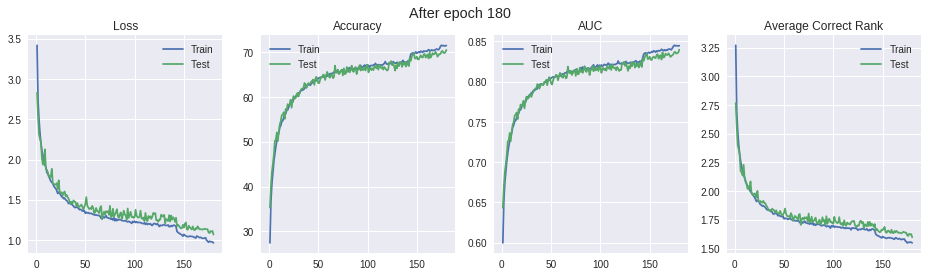

2018-12-20 01:00:48: After epoch 181, TRAIN acc is 71.7468,  loss is 0.9618, AUC is 0.8467, and correct rank is 1.5445
2018-12-20 01:00:56: After epoch 181, TEST acc is 70.3000, loss is 1.0977, AUC is 0.8377, and correct rank is 1.6134
2018-12-20 01:01:30: After epoch 182, TRAIN acc is 71.3939,  loss is 0.9663, AUC is 0.8443, and correct rank is 1.5487
2018-12-20 01:01:37: After epoch 182, TEST acc is 70.2000, loss is 1.1147, AUC is 0.8377, and correct rank is 1.6260
2018-12-20 01:02:10: After epoch 183, TRAIN acc is 71.7442,  loss is 0.9536, AUC is 0.8467, and correct rank is 1.5413
2018-12-20 01:02:18: After epoch 183, TEST acc is 69.4000, loss is 1.1122, AUC is 0.8328, and correct rank is 1.6280
2018-12-20 01:02:51: After epoch 184, TRAIN acc is 71.7008,  loss is 0.9665, AUC is 0.8461, and correct rank is 1.5466
2018-12-20 01:02:59: After epoch 184, TEST acc is 70.2000, loss is 1.0892, AUC is 0.8368, and correct rank is 1.6186
2018-12-20 01:03:32: After epoch 185, TRAIN acc is 71.42

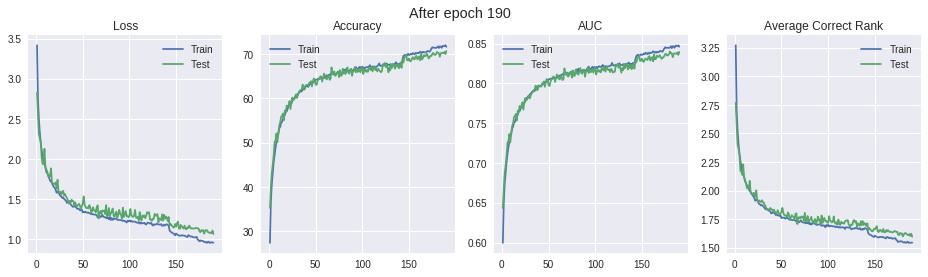

2018-12-20 01:07:31: After epoch 191, TRAIN acc is 71.6394,  loss is 0.9663, AUC is 0.8460, and correct rank is 1.5489
2018-12-20 01:07:38: After epoch 191, TEST acc is 70.5000, loss is 1.0708, AUC is 0.8380, and correct rank is 1.6080
2018-12-20 01:08:11: After epoch 192, TRAIN acc is 71.7903,  loss is 0.9563, AUC is 0.8470, and correct rank is 1.5446
2018-12-20 01:08:18: After epoch 192, TEST acc is 70.1000, loss is 1.1021, AUC is 0.8369, and correct rank is 1.6192
2018-12-20 01:08:51: After epoch 193, TRAIN acc is 71.7008,  loss is 0.9598, AUC is 0.8464, and correct rank is 1.5420
2018-12-20 01:08:58: After epoch 193, TEST acc is 69.9000, loss is 1.0868, AUC is 0.8354, and correct rank is 1.6114
2018-12-20 01:09:31: After epoch 194, TRAIN acc is 71.8772,  loss is 0.9520, AUC is 0.8476, and correct rank is 1.5400
2018-12-20 01:09:38: After epoch 194, TEST acc is 70.1000, loss is 1.0622, AUC is 0.8365, and correct rank is 1.6122
2018-12-20 01:10:11: After epoch 195, TRAIN acc is 71.43

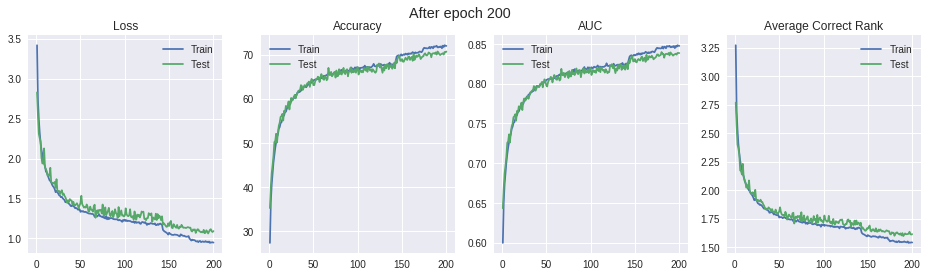

In [0]:
total_epochs = 200
wandb.config.update(dict(epochs=total_epochs), allow_val_change=True)

train(alphabetical_hinge_squared_dendrogram_loss_cnn_mlp, train_dataloader, test_dataloader, 
      num_epochs=total_epochs - current_epoch, epochs_to_test=1, epochs_to_graph=10, 
      num_batches_to_print=2000, start_epoch=current_epoch)

## Plot sample images, verifying I have the classes correct

Files already downloaded and verified


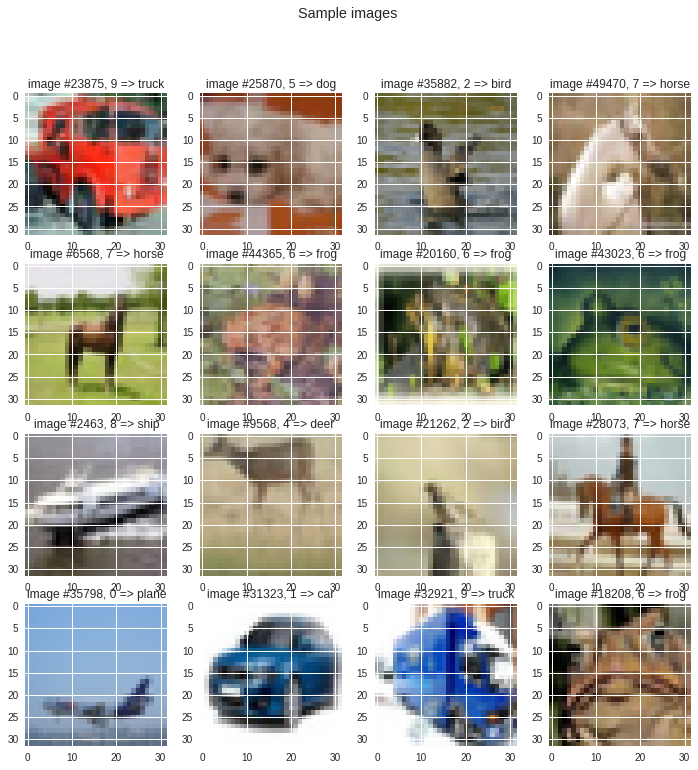

In [0]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
img_trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True)
# img_train_dataloader = torch.utils.data.DataLoader(img_trainset, batch_size=10, shuffle=True, num_workers=2)

classes = ('airplane', 'auto', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')



# get some random training images
n = 16
img_indices = np.random.randint(0, 50000, (n,))
images, labels = zip(*[img_trainset[i] for i in img_indices])

plt.figure(figsize=(12, 12))
plt.suptitle(f'Sample images')

for i in range(n):
    ax = plt.subplot(4, 4, i + 1)
    ax.set_title(f'image #{img_indices[i]}, {labels[i]} => {classes[labels[i]]}')
    ax.imshow(images[i])




## Compute and plot additional quantities for final report

Both the top-k accuracy for k = 2,3,4, and the average dendrogram distance of mistakes made. 

### Implement the additional tests

In [0]:
def additional_model_tests(models, epochs, dataloader=test_dataloader, 
                           dendrogram=dendrogram_loss, cuda=True):
    # for each model in the list
    for model in models:
        print(f'Starting with {model.name}')
        load_results = True
        # for each epoch of specified ones (every 10?)
        for epoch in epochs:
            print(f'Epoch #{epoch}')
            # load model to epoch
            try :
                model.load_model(epoch, load_results=load_results)
            
            except FileNotFoundError:
                print(f'Warning, model {model.name} did not have a file for epoch #{epoch}. Continuing... ')
                continue
                
            load_results = False
    
            # test, aggregating the results from each test batch
            test_acc, test_loss, test_auc, test_correct_rank, test_predictions, test_labels = test(model, dataloader, cuda, False, return_labels=True)
        
            if 'top_k' not in model.results:
                model.results['top_k'] = defaultdict(dict)
            
            test_correct_rank = np.array(test_correct_rank)
            test_predictions = np.array([t.cpu().numpy() for t in test_predictions])
            test_labels = np.array([t.cpu().numpy() for t in test_labels])
            
            # compute top-k for k \in [2, 3, 4]? saving results to the model
            for k in range(2, 5):
                model.results['top_k'][k][epoch] = np.mean(test_correct_rank <= k)
                
            # compute dendrogram distance using pred - omit places where pred == labels, where it is correct?
            pred_mistakes = test_predictions[test_predictions != test_labels]
            mistake_labels = test_labels[test_predictions != test_labels]
            distances = dendrogram.distances.cpu().numpy() - 1
            
            # TODO: verify and debug all of this indexing
            # TODO: consider more elaborate plots of these distributions, perhaps as they shift over training
            mistake_distances = distances[pred_mistakes, mistake_labels]
            
            if 'mistake_distances' not in model.results:
                model.results['mistake_distances'] = dict()
                
            model.results['mistake_distances'][epoch] = np.mean(mistake_distances)
            
                
        model.save_results()

    
    
# plot all of these (and other, pre-saved metrics, for all models)


### Create the models

In [0]:
alphabetical_edge_dicts = {
    'root': {'a-d': {'weight': 1}, 'f-z': {'weight': 1} },
    'a-d': {'a-c': {'weight': 1}, 'd': {'weight': 1}},
    'a-c': {'bird': {'weight': 1}, 'auto': {'weight': 1}, 'cat': {'weight': 1}},
    'd': {'deer': {'weight': 1}, 'dog': {'weight': 1}},
    'f-z': {'f-p': {'weight': 1}, 'q-z': {'weight': 1}},
    'f-p': {'frog': {'weight': 1}, 'horse': {'weight': 1}, 'airplane': {'weight': 1}},
    'q-z': {'ship': {'weight': 1}, 'truck': {'weight': 1}}
}

edge_dicts = {
    'root': {'transport': {'weight': 1}, 'animal': {'weight': 1} },
    'transport': {'air': {'weight': 1}, 'land': {'weight': 1}, 'sea': {'weight': 1} },
    'air': {'airplane': {'weight': 1}},
    'sea': {'ship': {'weight': 1}},
    'land': {'auto': {'weight': 0.5}, 'truck': {'weight': 0.5}},
    'animal': {'mammal': {'weight': 1}, 'bird': {'weight': 2}, 'frog': {'weight': 2}},
    'mammal': {'domsetic': {'weight': 0.5}, 'deer': {'weight': 1}, 'horse': {'weight': 1}},
    'domsetic': {'cat': {'weight': 0.5}, 'dog': {'weight': 0.5}}
}

actual_classes = ('airplane', 'auto', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [7]:
test_models, name_to_label = load_relevant_models()

512
512
512
512
512
512
512
512
512
512
512


In [23]:
test_models, name_to_label = load_relevant_models()

512
512
512
512
512
512
512
512
512
512
512


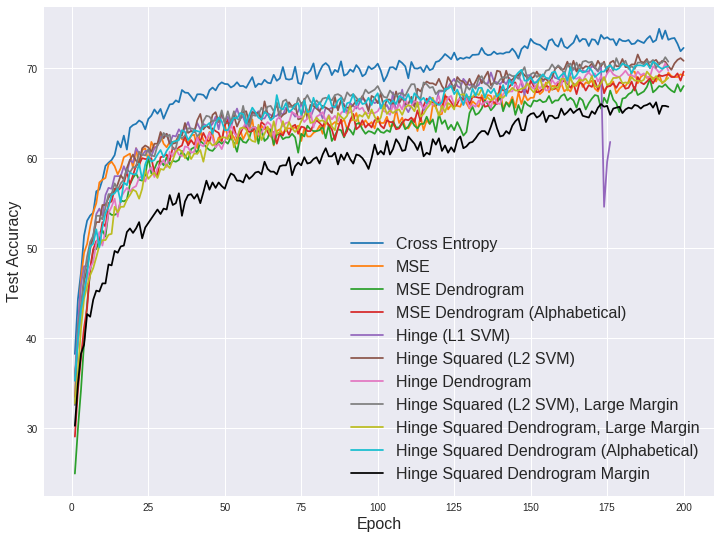

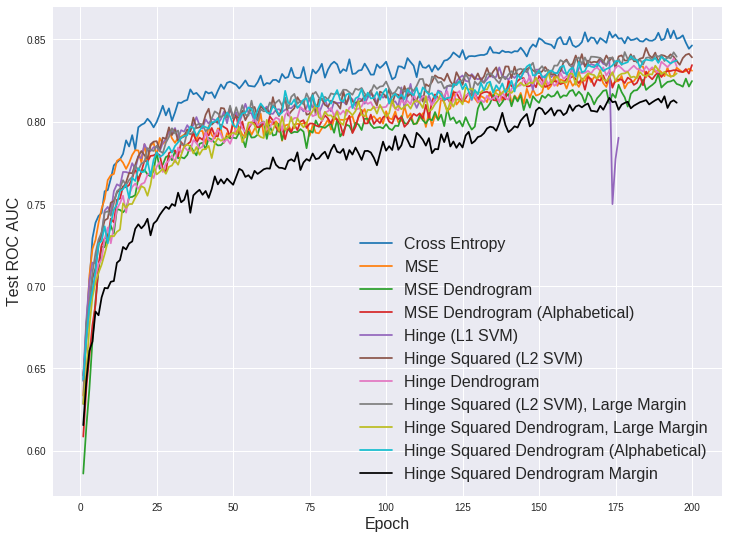

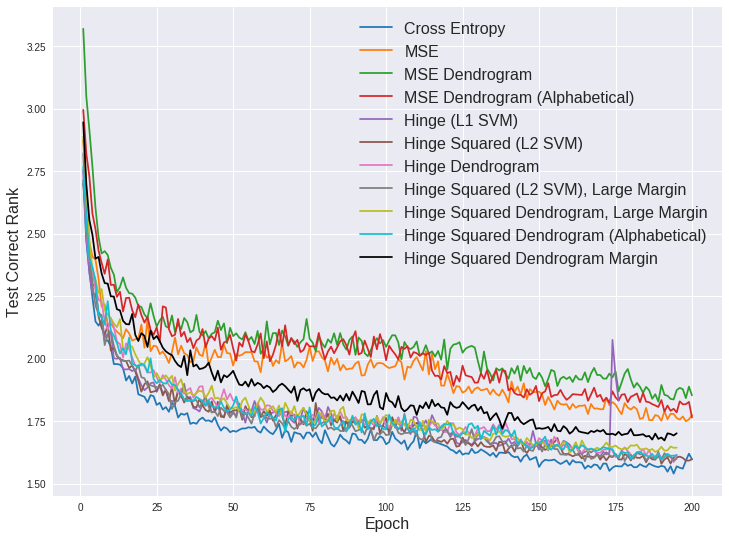

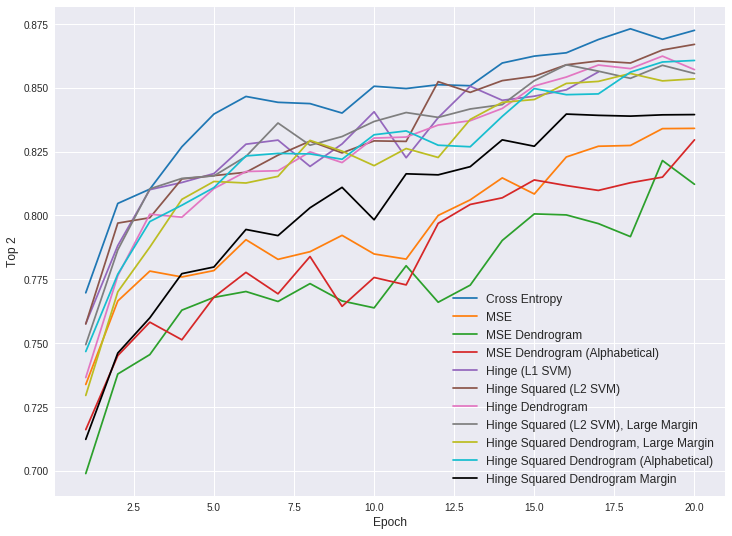

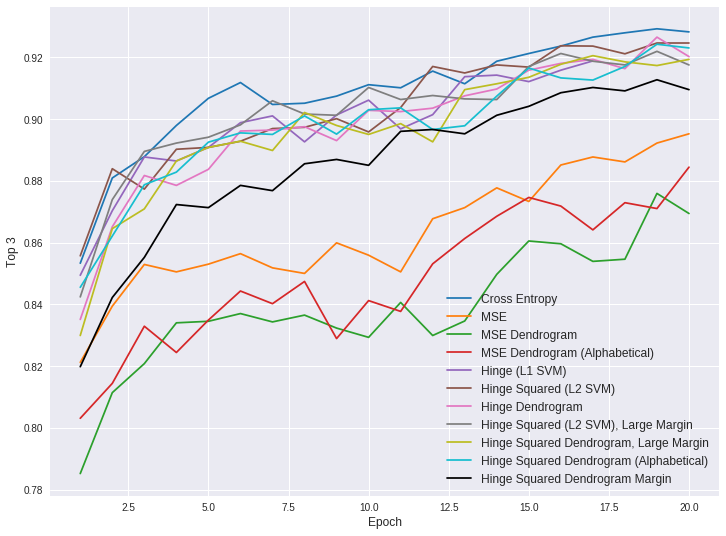

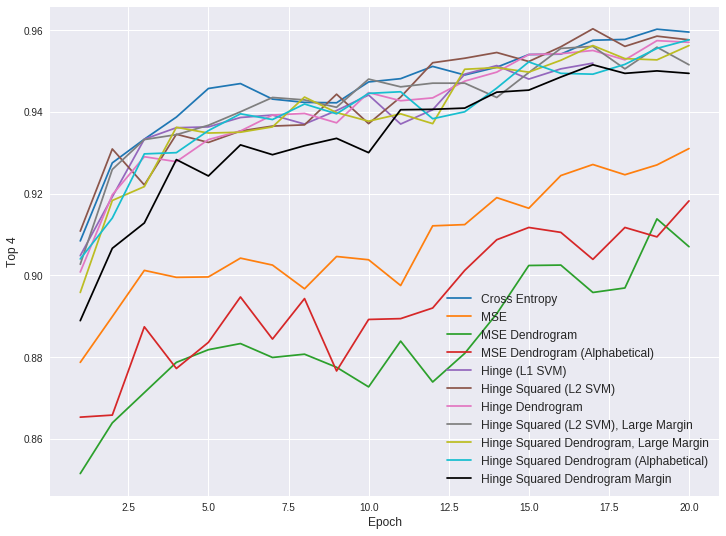

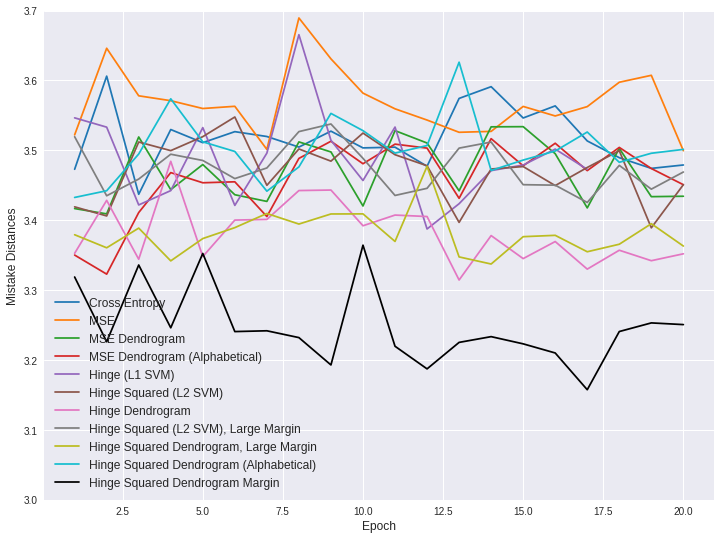

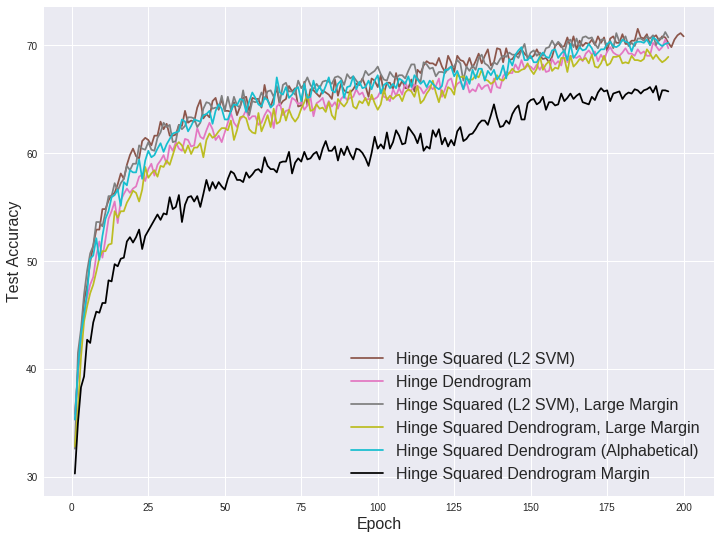

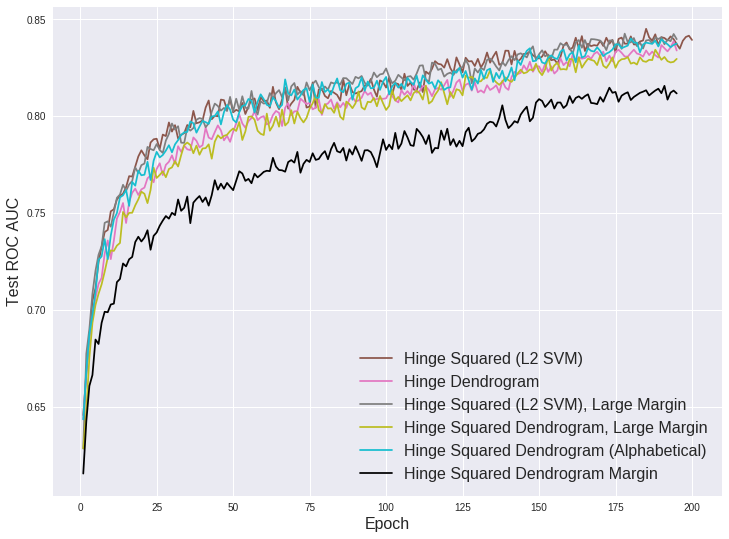

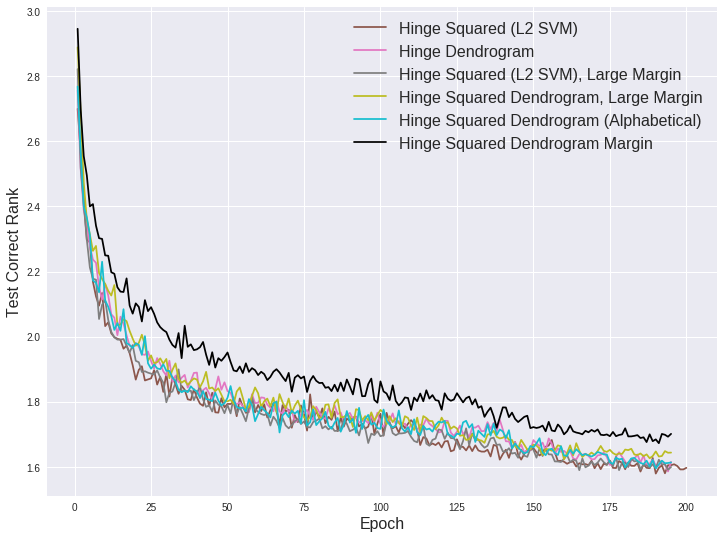

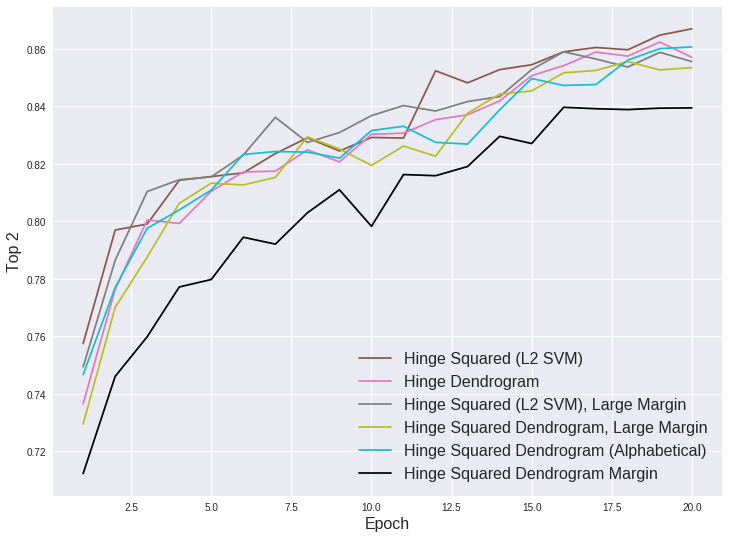

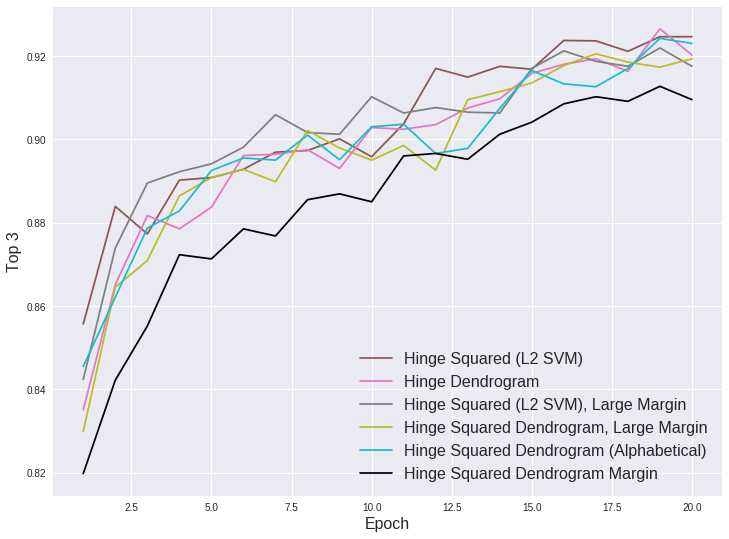

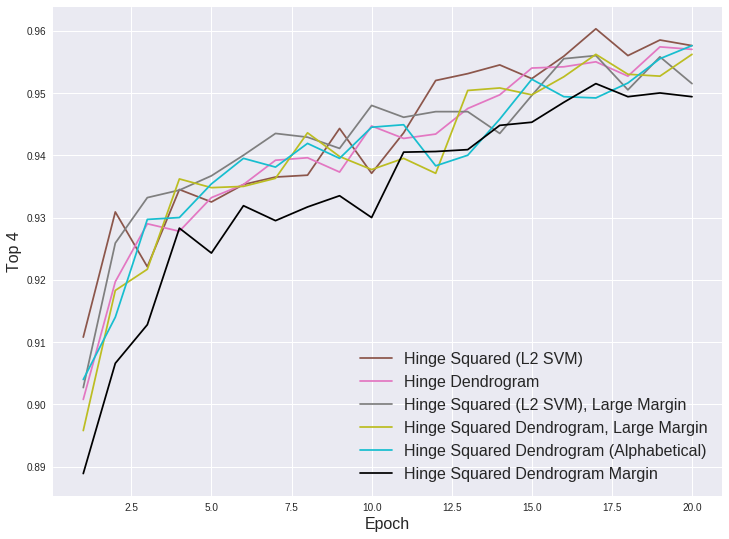

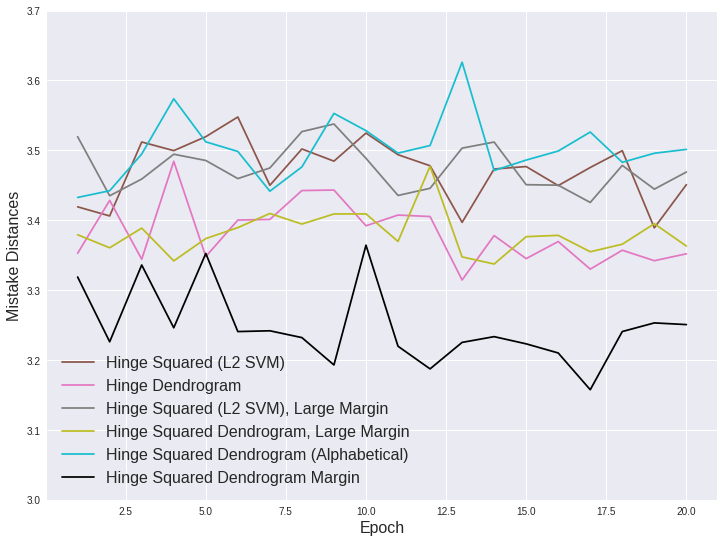

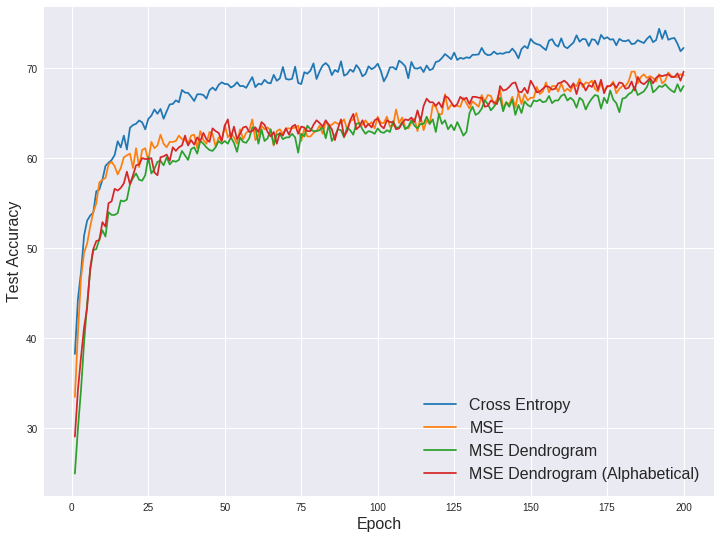

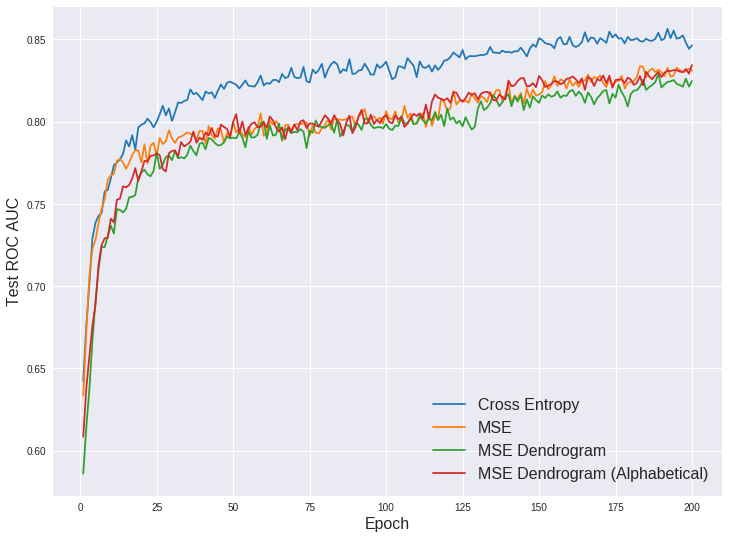

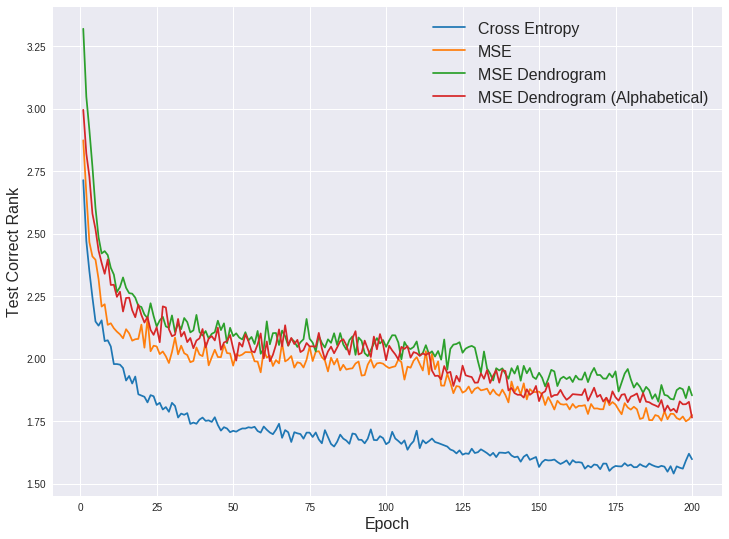

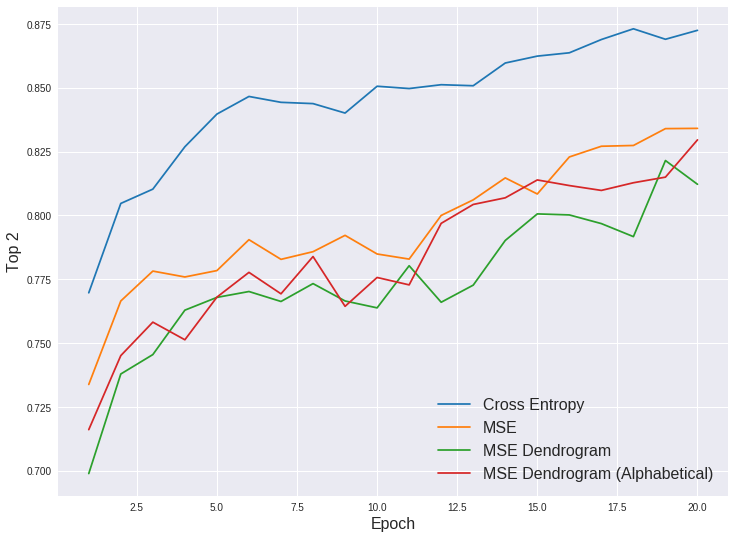

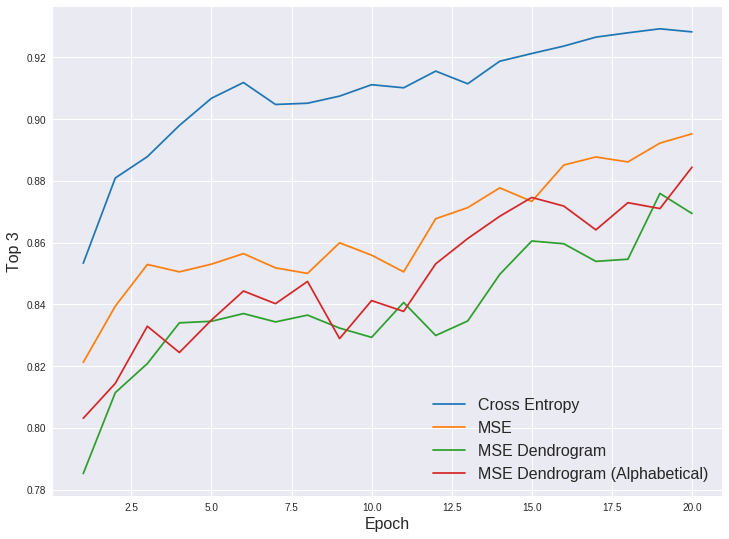

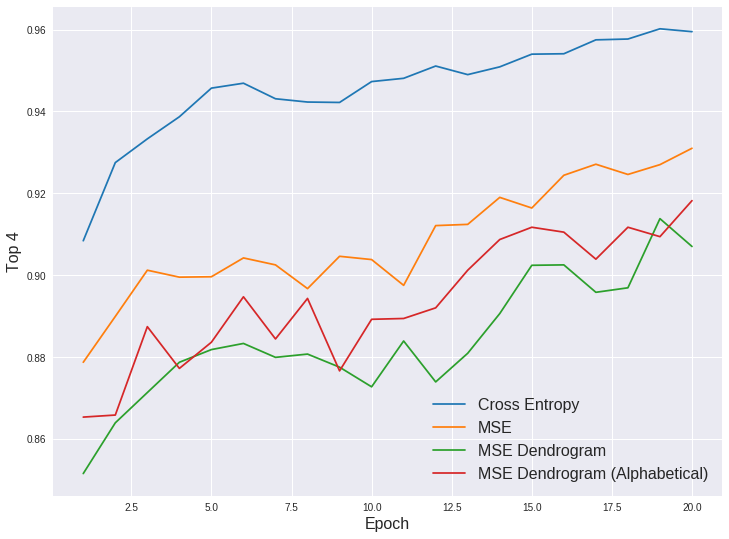

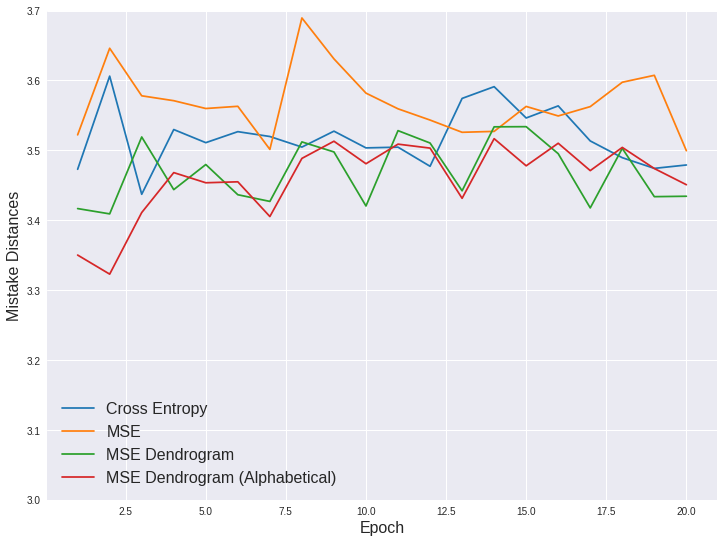

In [25]:
cm = plt.get_cmap('tab10')
colors = list(cm.colors)
colors.append((0, 0, 0))

hinge_model_subset = test_models[5:]
hinge_model_colors = colors[5:]

mse_model_subset = test_models[:4]
mse_model_colors = colors[:4]

model_sets = [test_models, hinge_model_subset, mse_model_subset]
model_colors = [colors, hinge_model_colors, mse_model_colors]
model_set_names = ['all_models', 'hinge_model_subset', 'mse_models']

font_sizes = (12, 16, 16)

model_specific_limits = {
    'hinge_dendrogram_loss_cnn_mlp': 195,
    'large_margin_hinge_squared_loss_cnn_mlp': 195,
    'large_margin_hinge_squared_dendrogram_loss_cnn_mlp': 195,
    'alphabetical_hinge_squared_dendrogram_loss_cnn_mlp': 195,
    'hinge_squared_dendrogram_margin_loss_cnn_mlp': 195,
    'hinge_loss_fixed_cnn_mlp': 176,
}

def top_k_extractor(results, k, keys):
    return [results[k][key] for key in keys if key in results[k]]
        
def mistake_distances_extractor(results, keys):
    return [results[key] for key in keys if key in results]

for model_set, color_set, set_name, font_size in zip(model_sets, model_colors, model_set_names, font_sizes):
    plot_model_results(model_set, name_to_label, 'test_accuracies', colors=color_set, 
                       model_specific_limits=model_specific_limits, save_name=f'{set_name}_test_accuracy.png')
    plot_model_results(model_set, name_to_label, 'test_aucs', 'Test ROC AUC', colors=color_set, 
                       model_specific_limits=model_specific_limits, save_name=f'{set_name}_test_roc_auc.png')
    plot_model_results(model_set, name_to_label, 'test_correct_rank', colors=color_set, 
                       model_specific_limits=model_specific_limits, save_name=f'{set_name}_test_correct_answer_rank.png')
    
    for k in range(2, 5):
        plot_model_results(model_set, name_to_label, 'top_k', f'Top {k}', colors=color_set, font_size=font_size,
                           model_specific_limits=model_specific_limits, save_name=f'{set_name}_test_top_{k}_accuracy.png',
                           result_extractor=top_k_extractor, result_extractor_params=dict(k=k, keys=range(10, 210, 10)))

    plot_model_results(model_set, name_to_label, 'mistake_distances', font_size=font_size, colors=color_set, ylim=(3.0, 3.7),
                       model_specific_limits=model_specific_limits, save_name=f'{set_name}_test_mistake_dendrogram_distance.png',
                       result_extractor=mistake_distances_extractor, result_extractor_params=dict(keys=range(10, 210, 10)))
    

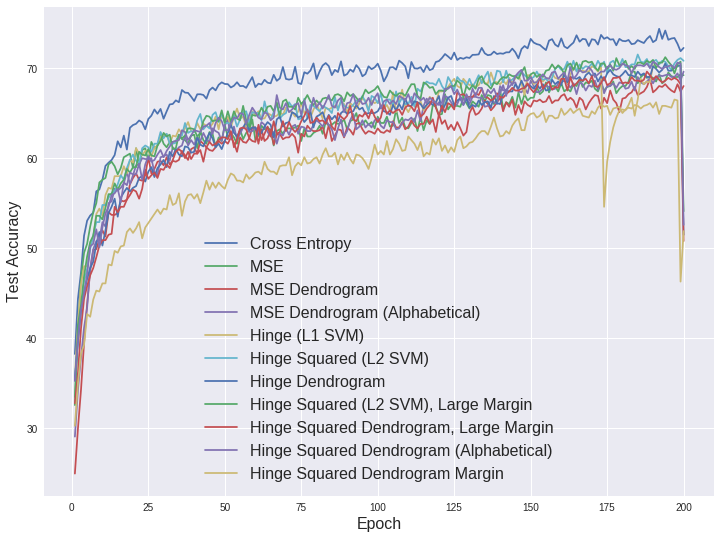

In [0]:
plot_model_results('test_accuracies', save_name='all_model_test_accuracy.png')

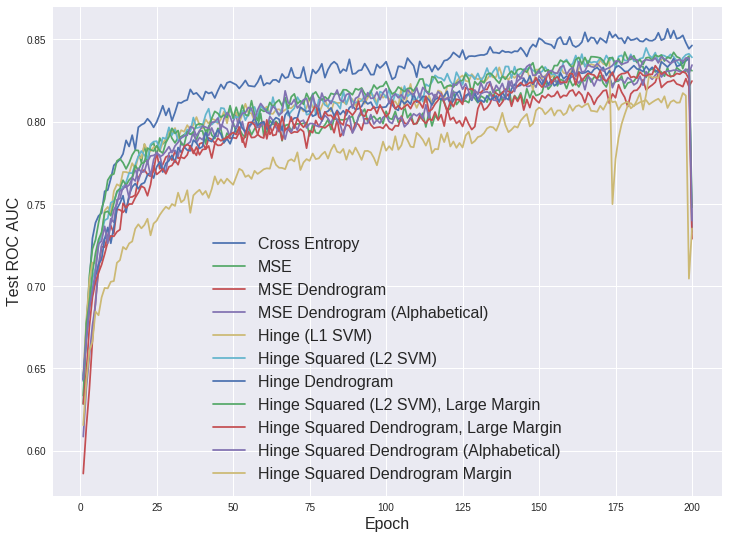

In [0]:
plot_model_results('test_aucs', 'Test ROC AUC', save_name='all_model_test_roc_auc.png')

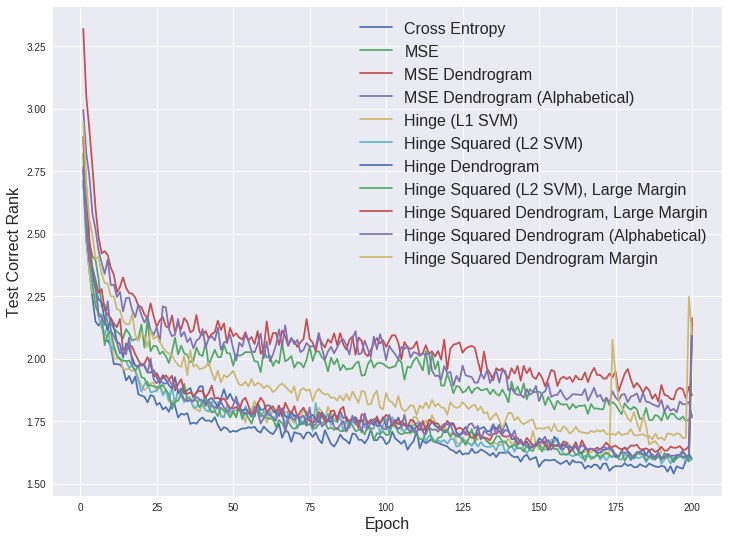

In [0]:
plot_model_results('test_correct_rank', save_name='all_model_test_correct_answer_rank.png')

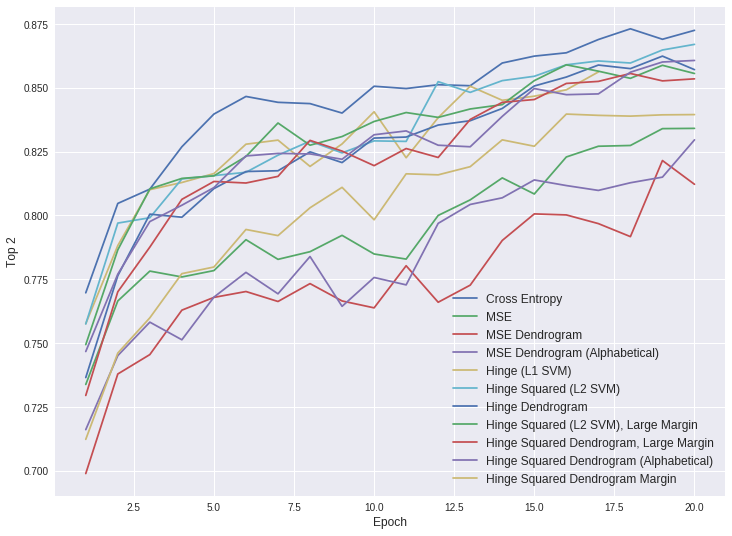

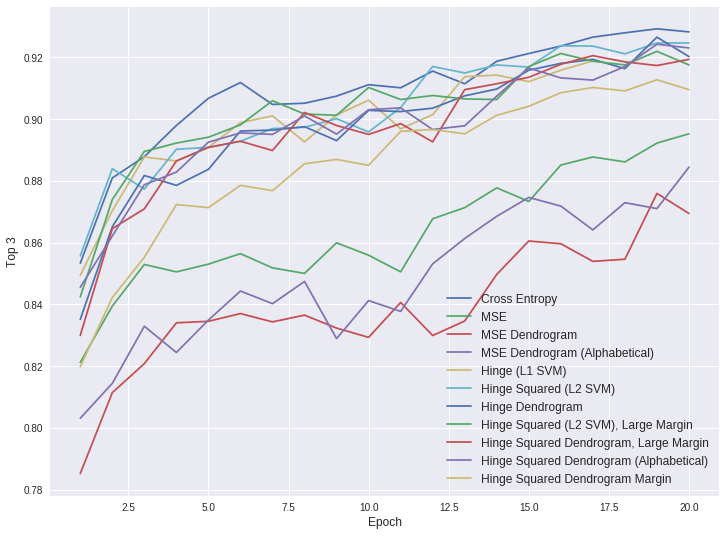

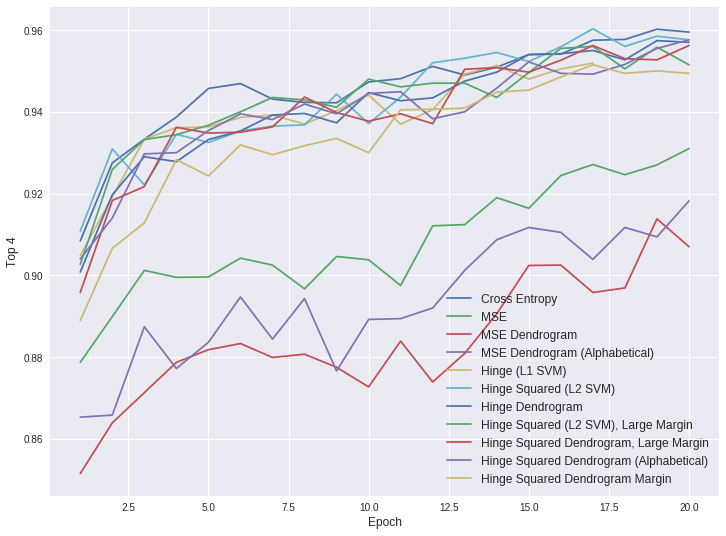

In [0]:
def top_k_extractor(results, k, keys):
    return [results[k][key] for key in keys if key in results[k]]

for k in range(2, 5):
    plot_model_results('top_k', f'Top {k}', font_size=12, save_name=f'all_model_test_top_{k}_accuracy.png',
                       result_extractor=top_k_extractor, result_extractor_params=dict(k=k, keys=range(10, 210, 10)))

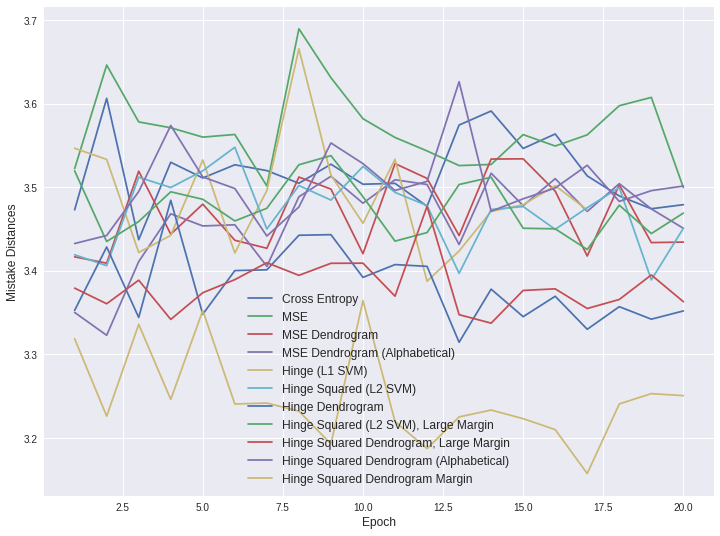

In [0]:
def mistake_distances_extractor(results, keys):
    return [results[key] for key in keys if key in results]

plot_model_results('mistake_distances', font_size=12, save_name='all_model_test_mistake_dendrogram_distance.png',
                   result_extractor=mistake_distances_extractor, result_extractor_params=dict(keys=range(10, 210, 10)))

In [26]:
import tabulate

list_keys = ('test_accuracies', 'test_aucs', 'test_correct_rank')

table_rows = []

for model in test_models:
    n = min(model.name in model_specific_limits and model_specific_limits[model.name] or 200, len(model.results[list_keys[0]]) - 1)
    
    table_rows.append([name_to_label[model.name]] + [model.results[key][n] for key in list_keys])
    

for model, row in zip(test_models, table_rows):
    for k in range(2, 5):
        row.append(model.results['top_k'][k][max(model.results['top_k'][k].keys())])
        
    row.append(model.results['mistake_distances'][max(model.results['mistake_distances'].keys())])
    

headers = ('Model Name', 'Accuracy', 'ROC AUC', 'Correct Result Rank', 'Top 2 Acc.', 'Top 3 Acc.', 'Top 4 Acc.', 'Mistake Dendrogram Distance')
    
print(tabulate.tabulate(table_rows, headers, 'fancy_grid'))

print(tabulate.tabulate(table_rows, headers, 'latex'))


╒═════════════════════════════════════════╤════════════╤═══════════╤═══════════════════════╤══════════════╤══════════════╤══════════════╤═══════════════════════════════╕
│ Model Name                              │   Accuracy │   ROC AUC │   Correct Result Rank │   Top 2 Acc. │   Top 3 Acc. │   Top 4 Acc. │   Mistake Dendrogram Distance │
╞═════════════════════════════════════════╪════════════╪═══════════╪═══════════════════════╪══════════════╪══════════════╪══════════════╪═══════════════════════════════╡
│ Cross Entropy                           │      72.43 │  0.847021 │                1.5911 │       0.8725 │       0.9282 │       0.9595 │                       3.47904 │
├─────────────────────────────────────────┼────────────┼───────────┼───────────────────────┼──────────────┼──────────────┼──────────────┼───────────────────────────────┤
│ MSE                                     │      69.3  │  0.83267  │                1.7522 │       0.8341 │       0.8952 │       0.931  │             

In [0]:
test_models[0].results.keys()

dict_keys(['epoch', 'train_accuracies', 'train_losses', 'test_accuracies', 'test_losses', 'train_aucs', 'test_aucs', 'train_correct_rank', 'test_correct_rank', 'top_k', 'mistake_distances', 'test_accuracy'])

In [0]:
print('\n'.join([name_to_label[model.name] for model in test_models]))

Cross Entropy
MSE
MSE Dendrogram
MSE Dendrogram (Alphabetical)
Hinge (L1 SVM)
Hinge Squared (L2 SVM)
Hinge Dendrogram
Hinge Squared (L2 SVM), Large Margin
Hinge Squared Dendrogram, Large Margin
Hinge Squared Dendrogram (Alphabetical)
Hinge Squared Dendrogram Margin


In [0]:
s.title()

'Abc Def'

In [0]:
plt.savefig?

In [0]:
', '.join(actual_classes)

'airplane, auto, bird, cat, deer, dog, frog, horse, ship, truck'